# 1. Giới thiệu dự án
**Vi-rút Corona** là một họ vi rút có thể gây bệnh, có thể thay đổi từ *cảm lạnh thông thường* và *ho* đến bệnh đôi khi nặng hơn. **Hội chứng hô hấp Trung Đông (MERS-CoV)** và **Hội chứng hô hấp cấp tính nặng (SARS-CoV)** là những trường hợp nghiêm trọng mà thế giới đã phải đối mặt. <br> **SARS-CoV-2 (n -coronavirus)** là loại virus mới thuộc họ coronavirus, được *phát hiện lần đầu tiên* vào năm 2019, chưa được xác định ở người trước đây.

Nó là một loại vi-rút *truyền nhiễm* bắt đầu từ **Vũ Hán** vào **tháng 12 năm 2019**. Sau đó được tuyên bố là **Đại dịch** bởi **WHO** do tỷ lệ lây lan cao trên toàn thế giới. Hiện tại (vào ngày 21 tháng 4 năm 2021), điều này dẫn đến tổng số 500.000+ Số ca tử vong trên toàn cầu. <br>

Đại dịch đang lan rộng trên toàn thế giới; nhận thức về sự lây lan này trở nên quan trọng hơn. NoteBook này là một nỗ lực để phân tích dữ liệu tích lũy của các trường hợp đã xác nhận, tử vong và đã được phục hồi theo thời gian.
     <br>
   <font face = "Verdana" size ="1">
    <center><img src='https://www.statnews.com/wp-content/uploads/2020/02/Coronavirus-CDC-645x645.jpg'></center>
    </font>
 <center><font face = "Verdana" size ="4"> Mạnh mẽ lên, thế giới! Hãy an toàn và khỏe mạnh. </font><center>

<br>

# Mục lục
* [2. Tải xuống và cài đặt Prerequisite](#2.-Downloading-and-Installing-Prerequisite)
    
* [3. Tải xuống Tập dữ liệu và tìm hiểu dữ liệu](#3.-Downloading-the-Dataset)

* [4. Phân tích toàn cầu](#4.-Global-Analysis)

    * [Bài toán 1](#Problem-1)
    * [Bài toán 2](#Problem-2)
    * [Bài toán 3](#Problem-3)
    * [Bài toán 4](#Problem-4)
    * [Bài toán 5](#Problem-5)
    * [Bài toán 6](#Problem-6)
    * [Bài toán 7](#Problem-7)

* [5. Phân tích theo lục địa](#5.-Continent-Analysis)
    * [Bài toán 8](#Problem-8)
    * [Bài toán 9](#Problem-9)
    * [Bài toán 10](#Problem-10)
    * [Bài toán 11](#Problem-11)
    * [Bài toán 12](#Problem-12)
    * [Bài toán 13](#Problem-13)

* [6. Phân tích theo quốc gia](#5.-Country-Analysis)
    * [Bài toán 14](#Problem-14)
    * [Bài toán 15](#Problem-15)
    * [Bài toán 16](#Problem-16)
    * [Bài toán 17](#Problem-17)
    
* [7. Phân tích nâng cao](#7.-Advanced-Analysis)
    * [Bài toán 18](#Problem-18)
    * [Bài toán 19](#Problem-19)
    * [Bài toán 20](#Problem-20)
    * [Bài toán 21](#Problem-21)
    * [Bài toán 22](#Problem-22)

# 2. Tải xuống và Cài đặt Prerequisite
**pycountry_convert**: Sử dụng dữ liệu quốc gia lấy từ wikipedia, gói này cung cấp các chức năng chuyển đổi giữa tên quốc gia ISO, mã quốc gia và tên lục địa.

**folium, seaborn, plotly**: Một số gói trực quan hóa trong Python.

Bỏ ghi chú và cài đặt một số gói nếu bạn chưa cài đặt chúng. Nếu không, hãy tiếp tục.

In [3]:

!pip install pycountry_convert
!pip install folium
!pip install seaborn
!pip install plotly


In [4]:
!pip install pycountry_convert

In [7]:
import sys
sys.path.append('d:\\notion\\funix\\python3\\lib\\site-packages')

In [9]:
#Importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import pycountry_convert as pc
import folium
from pycountry_convert import country_mappings as cm
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import plotly.graph_objs as go
import json
import plotly.offline as py
import seaborn as sns
plt.style.use('fivethirtyeight')

# 3. Tải xuống tập dữ liệu và tìm hiểu dữ liệu
Sau khi tải xuống tập dữ liệu, hãy trả lời các câu hỏi sau:
- Xác định ngày đầu tiên bộ dữ liệu bắt đầu lưu trữ số ca Covid của 3 bộ dữ liệu.
- Xác định ngày cuối cùng dữ liệu được cập nhật số ca Covid của 3 bộ dữ liệu.
- Xác định có bao nhiêu quốc gia trong dữ liệu này.
- Tính tổng số ngày có trong 3 bộ dữ liệu
Quan sát xem có quốc gia nào bị trùng lặp trong 3 bộ dữ liệu hay không.
- Xác định những quốc gia có trong 3 bộ dữ liệu được lưu trữ số ca Covid theo toàn quốc chứ không theo từng thành phố.
- Xác định những quốc gia có trong 3 bộ dữ liệu được lưu trữ số ca Covid theo từng thành phố.
- Xác định quốc gia và ngày mà có số ca Covid nhiều nhất.
- Xác định quốc gia có tổng số người mất do Covid là nhiều nhất.
- Tính tổng số ca Covid, số ca tử vong, cố ca hồi phục và số ca còn Covid ở thời điểm hiện tại của Việt Nam.

Tập dữ liệu này được cập nhật hàng ngày bởi Johns Hopkins CSSE.

In [11]:
# Global Data
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [13]:
confirmed_df = confirmed_df.loc[:,:"8/4/21"]
deaths_df = deaths_df.loc[:,:"8/4/21"]
recoveries_df = recoveries_df.loc[:,:"8/4/21"]

## Hãy xem dữ liệu tổng quan:

In [15]:
confirmed_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/26/21  7/27/21  7/28/21  \
0        0        0        0        0  ...   144285   145008   145552   
1        0        0        0        0  ...   132891   132922   132952   
2        0        0        0        0  ...   163660   165204   167131   
3        0        0        0        0  ...    14577    14586    14586   
4        0        0        0        0  ...    41879    42110    42288   

   7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
0   145996   146523   147154  147501  147985  148572  148933  
1   132999   133036   133081  133121  133146  133211  133310  
2   168668   170189   171392  172564  173922  175229  176724  
3    14655    14678    14678   14678   14747   14766   14797  
4    42486    42646    42777   42815   42970   43070   43158  

[5 rows x 565 columns]

In [23]:
deaths_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/26/21  7/27/21  7/28/21  \
0        0        0        0        0  ...     6477     6515     6577   
1        0        0        0        0  ...     2456     2456     2457   
2        0        0        0        0  ...     4087     4112     4161   
3        0        0        0        0  ...      127      127      127   
4        0        0        0        0  ...      991      994     1000   

   7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
0     6615     6677     6708    6737    6774    6804    6836  
1     2457     2457     2457    2457    2457    2457    2457  
2     4189     4219     4254    4291    4329    4370    4404  
3      127      128      128     128     128     128     128  
4     1003     1008     1011    1016    1018    1022    1026  

[5 rows x 565 columns]

In [25]:
recoveries_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/26/21  7/27/21  7/28/21  \
0        0        0        0        0  ...    82586    82586    82586   
1        0        0        0        0  ...   130152   130166   130174   
2        0        0        0        0  ...   111322   112050   112900   
3        0        0        0        0  ...    14077    14113    14113   
4        0        0        0        0  ...    35686    35742    35964   

   7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
0    82586    82586    82586   82586   82586   82586   82586  
1   130187   130205   130222  130243  130256  130291  130314  
2   113707   114531   115276  116009  116770  117557  118409  
3    14180    14210    14210   14210   14296   14348   14380  
4    36025    36708    37255   37397   38360   39389   39582  

[5 rows x 565 columns]

#  4. Phân tích Toàn cầu

## Bài toán 1

    Tính tổng số trường hợp mắc, tổng số người chết, tổng số người phục hồi và tổng số đang điều trị theo thời gian (theo ngày).

In [17]:
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]
dates = confirmed.keys()

total_cases = []
total_deaths = []
mortality_rate = []
recovery_rate = []
total_recovered = []
total_active = []
adjusted_dates = list(np.array([i for i in range(len(dates))]).reshape(-1, 1)[:, 0])

#Nhập mã lập trình của bạn tại đây:
for i in adjusted_dates:
    total_cases.append(confirmed.iloc[:,i].sum())
    total_deaths.append(deaths.iloc[:,i].sum())
    total_recovered.append(recoveries.iloc[:,i].sum())
    total_active.append(confirmed.iloc[:,i].sum()-deaths.iloc[:,i].sum()-recoveries.iloc[:,i].sum())
    

In [29]:
#  The number of total cases, total deaths, total recovered, and total active until now.
print("Total confirmed cases: ", total_cases[-1])
print("Total death cases: ", total_deaths[-1])
print("Total recoveries cases: ", total_recovered[-1])
print("Total active cases: ", total_active[-1])

Total confirmed cases:  200758588
Total death cases:  4283016
Total recoveries cases:  130899061
Total active cases:  65576511


## Bài toán 2

    Trực quan hóa số lượng và log(10) tổng số trường hợp, tổng số người chết, tổng số người phục hồi và tổng số đang điều trị theo thời gian (đơn vị ngày) trong 2 biểu đồ (một cho số lượng và một cho log(10)) sử dụng biểu đồ đường.

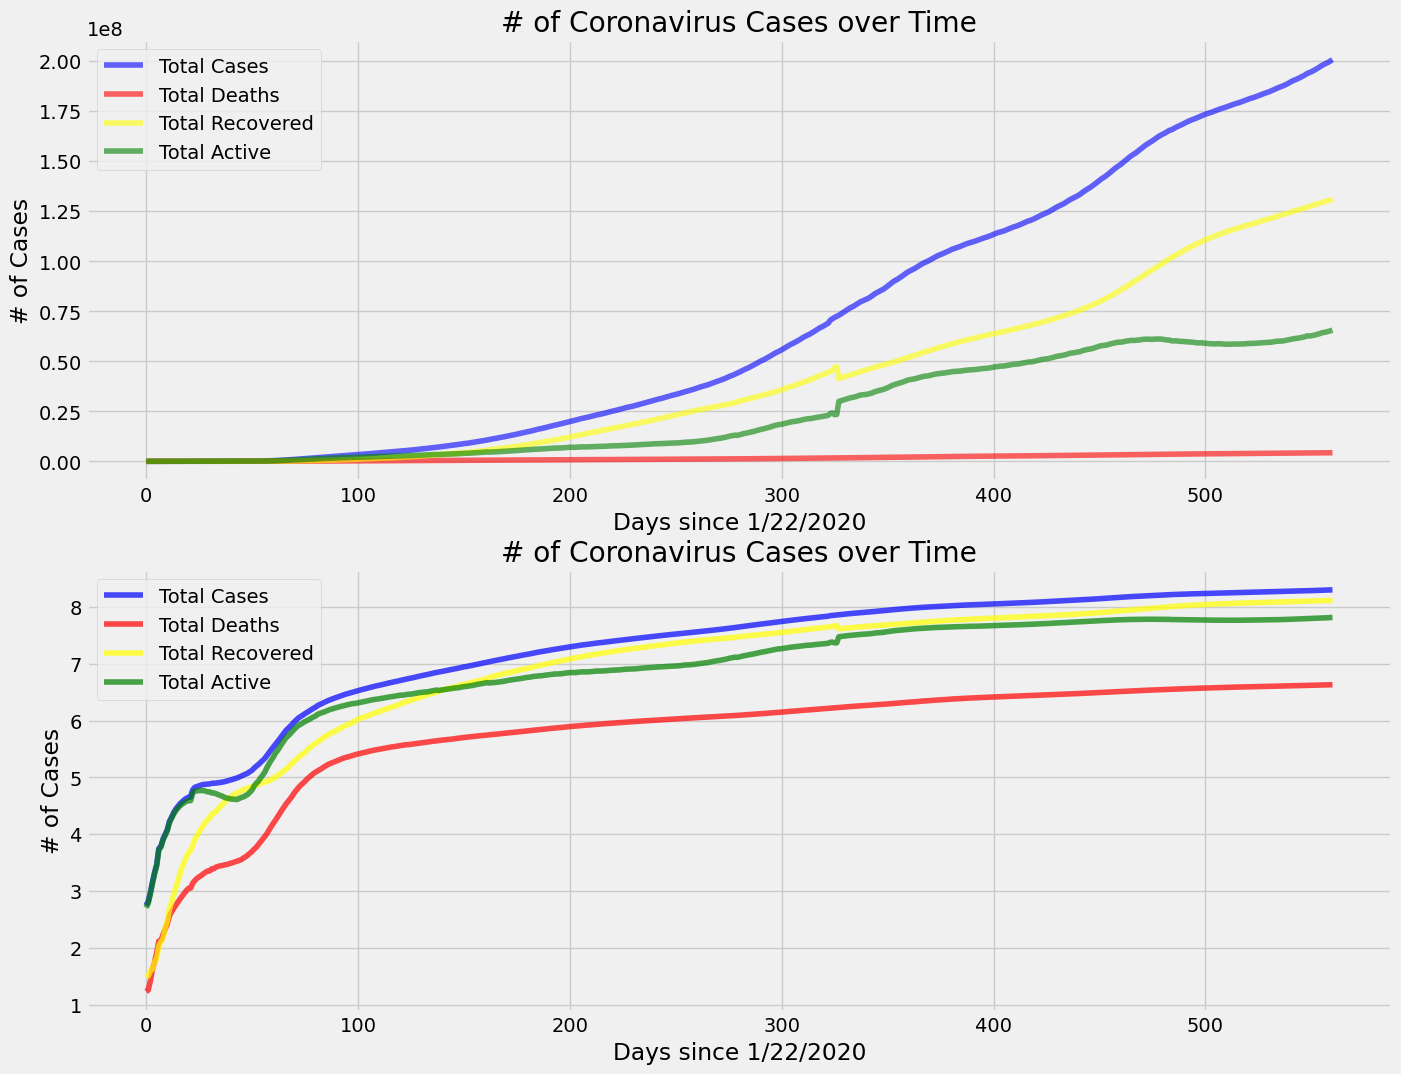

In [19]:
#Nhập mã lập trình của bạn tại đây:

cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]
dates = confirmed.keys()

total_cases = []
total_deaths = []
mortality_rate = []
recovery_rate = []
total_recovered = []
total_active = []
adjusted_dates = list(np.array([i for i in range(len(dates))]).reshape(-1, 1)[:, 0])

#Nhập mã lập trình của bạn tại đây:
for i in adjusted_dates:
    total_cases.append(confirmed.iloc[:,i].sum())
    total_deaths.append(deaths.iloc[:,i].sum())
    total_recovered.append(recoveries.iloc[:,i].sum())
    total_active.append(confirmed.iloc[:,i].sum()-deaths.iloc[:,i].sum()-recoveries.iloc[:,i].sum())
    
# Plotting
fig = plt.figure(figsize=(15, 12))
ax0 = fig.add_subplot(2,1,1)
ax1 = fig.add_subplot(2,1,2)

# Subplot 1: Cases in raw numbers
ax0.plot(adjusted_dates, total_cases, label='Total Cases', color='blue', alpha=0.6)
ax0.plot(adjusted_dates, total_deaths, label='Total Deaths', color='red', alpha=0.6)
ax0.plot(adjusted_dates, total_recovered, label='Total Recovered', color='yellow', alpha=0.6)
ax0.plot(adjusted_dates, total_active, label='Total Active', color='green', alpha=0.6)

# Formatting the subplot1
ax0.set_xlabel('Days since 1/22/2020')
ax0.set_ylabel('# of Cases')
ax0.set_title('# of Coronavirus Cases over Time')
ax0.legend(loc='upper left')
ax0.grid(True)

# Subplot 2: Cases in normalized logarithmic scale
ax1.plot(adjusted_dates, np.log10(total_cases), label='Total Cases', color='blue', alpha=0.7)
ax1.plot(adjusted_dates, np.log10(total_deaths), label='Total Deaths', color='red', alpha=0.7)
ax1.plot(adjusted_dates, np.log10(total_recovered), label='Total Recovered', color='yellow', alpha=0.7)
ax1.plot(adjusted_dates, np.log10(total_active), label='Total Active', color='green', alpha=0.7)

# Formatting the subplot2
ax1.set_xlabel('Days since 1/22/2020')
ax1.set_ylabel('# of Cases')
ax1.set_title('# of Coronavirus Cases over Time')
ax1.legend(loc='upper left')
ax1.grid(True)

## Bài toán 3
    Trực quan hóa tổng số ca bệnh, tổng số người chết, tổng số người phục hồi và tổng số đang điều trị theo thời gian (đơn vị ngày) trong 4 biểu đồ được phân tách bằng cách sử dụng biểu đồ đường.

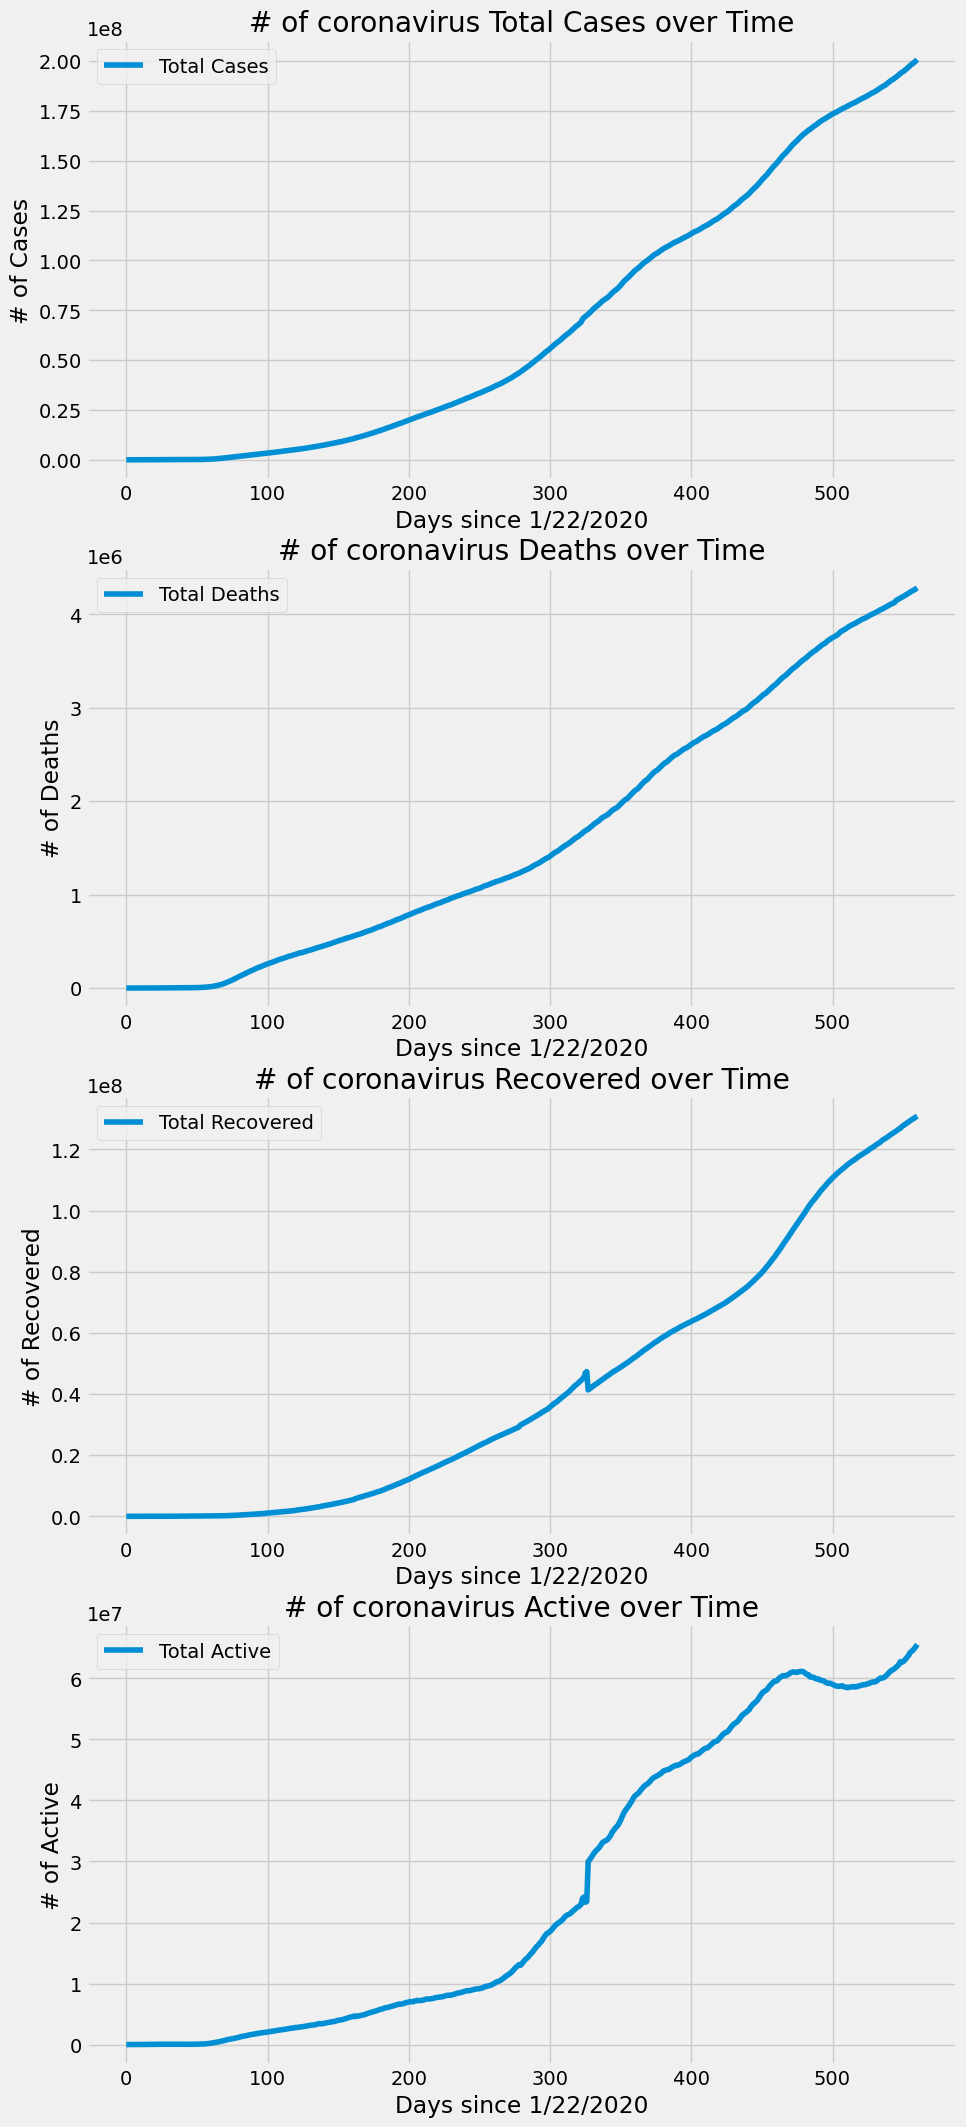

In [21]:
#Nhập mã lập trình của bạn tại đây:

# Create subplots
fig = plt.figure(figsize=(10, 25))
ax0 = fig.add_subplot(4,1,1)
ax1 = fig.add_subplot(4,1,2)
ax2 = fig.add_subplot(4,1,3)
ax3 = fig.add_subplot(4,1,4)

# Plot total confirmed cases
ax0.plot(adjusted_dates, total_cases, label='Total Cases')
ax0.set_title('# of coronavirus Total Cases over Time')
ax0.set_ylabel('# of Cases')
ax0.set_xlabel('Days since 1/22/2020')
ax0.legend()
ax0.grid(True)

# Plot total deaths
ax1.plot(adjusted_dates, total_deaths, label='Total Deaths')
ax1.set_title('# of coronavirus Deaths over Time')
ax1.set_ylabel('# of Deaths')
ax1.set_xlabel('Days since 1/22/2020')
ax1.legend()
ax1.grid(True)

# Plot total recoveries
ax2.plot(adjusted_dates, total_recovered, label='Total Recovered')
ax2.set_title('# of coronavirus Recovered over Time')
ax2.set_ylabel('# of Recovered')
ax2.set_xlabel('Days since 1/22/2020')
ax2.legend()
ax2.grid(True)

# Plot total active cases
ax3.plot(adjusted_dates, total_active, label='Total Active')
ax3.set_title('# of coronavirus Active over Time')
ax3.set_ylabel('# of Active')
ax3.set_xlabel('Days since 1/22/2020')
ax3.legend()
ax3.grid(True)

plt.show()

## Bài toán 4
    Tính toán số lượng gia tăng hàng ngày trong tổng số trường hợp, tổng số người chết, tổng số người hồi phục và tổng số đang điều trị theo thời gian (đơn vị ngày).

In [23]:
#Nhập mã lập trình của bạn tại đây:
daily_increase_case = [total_cases[i] - total_cases[i - 1] if i > 0 else total_cases[0] for i in range(len(total_cases))]
daily_increase_death = [total_deaths[i] - total_deaths[i - 1] if i > 0 else total_deaths[0] for i in range(len(total_deaths))]
daily_increase_recover = [total_recovered[i] - total_recovered[i - 1] if i > 0 else total_recovered[0] for i in range(len(total_recovered))]
daily_increase_active = [total_active[i] - total_active[i - 1] if i > 0 else total_active[0] for i in range(len(total_active))]

## Bài toán 5
    Trực quan hóa số lượng gia tăng hàng ngày về tổng số trường hợp, tổng số người chết, tổng số người phục hồi và tổng số đang điều trị theo thời gian (đơn vị ngày) trong 4 biểu đồ riêng biệt bằng cách sử dụng biểu đồ cột.

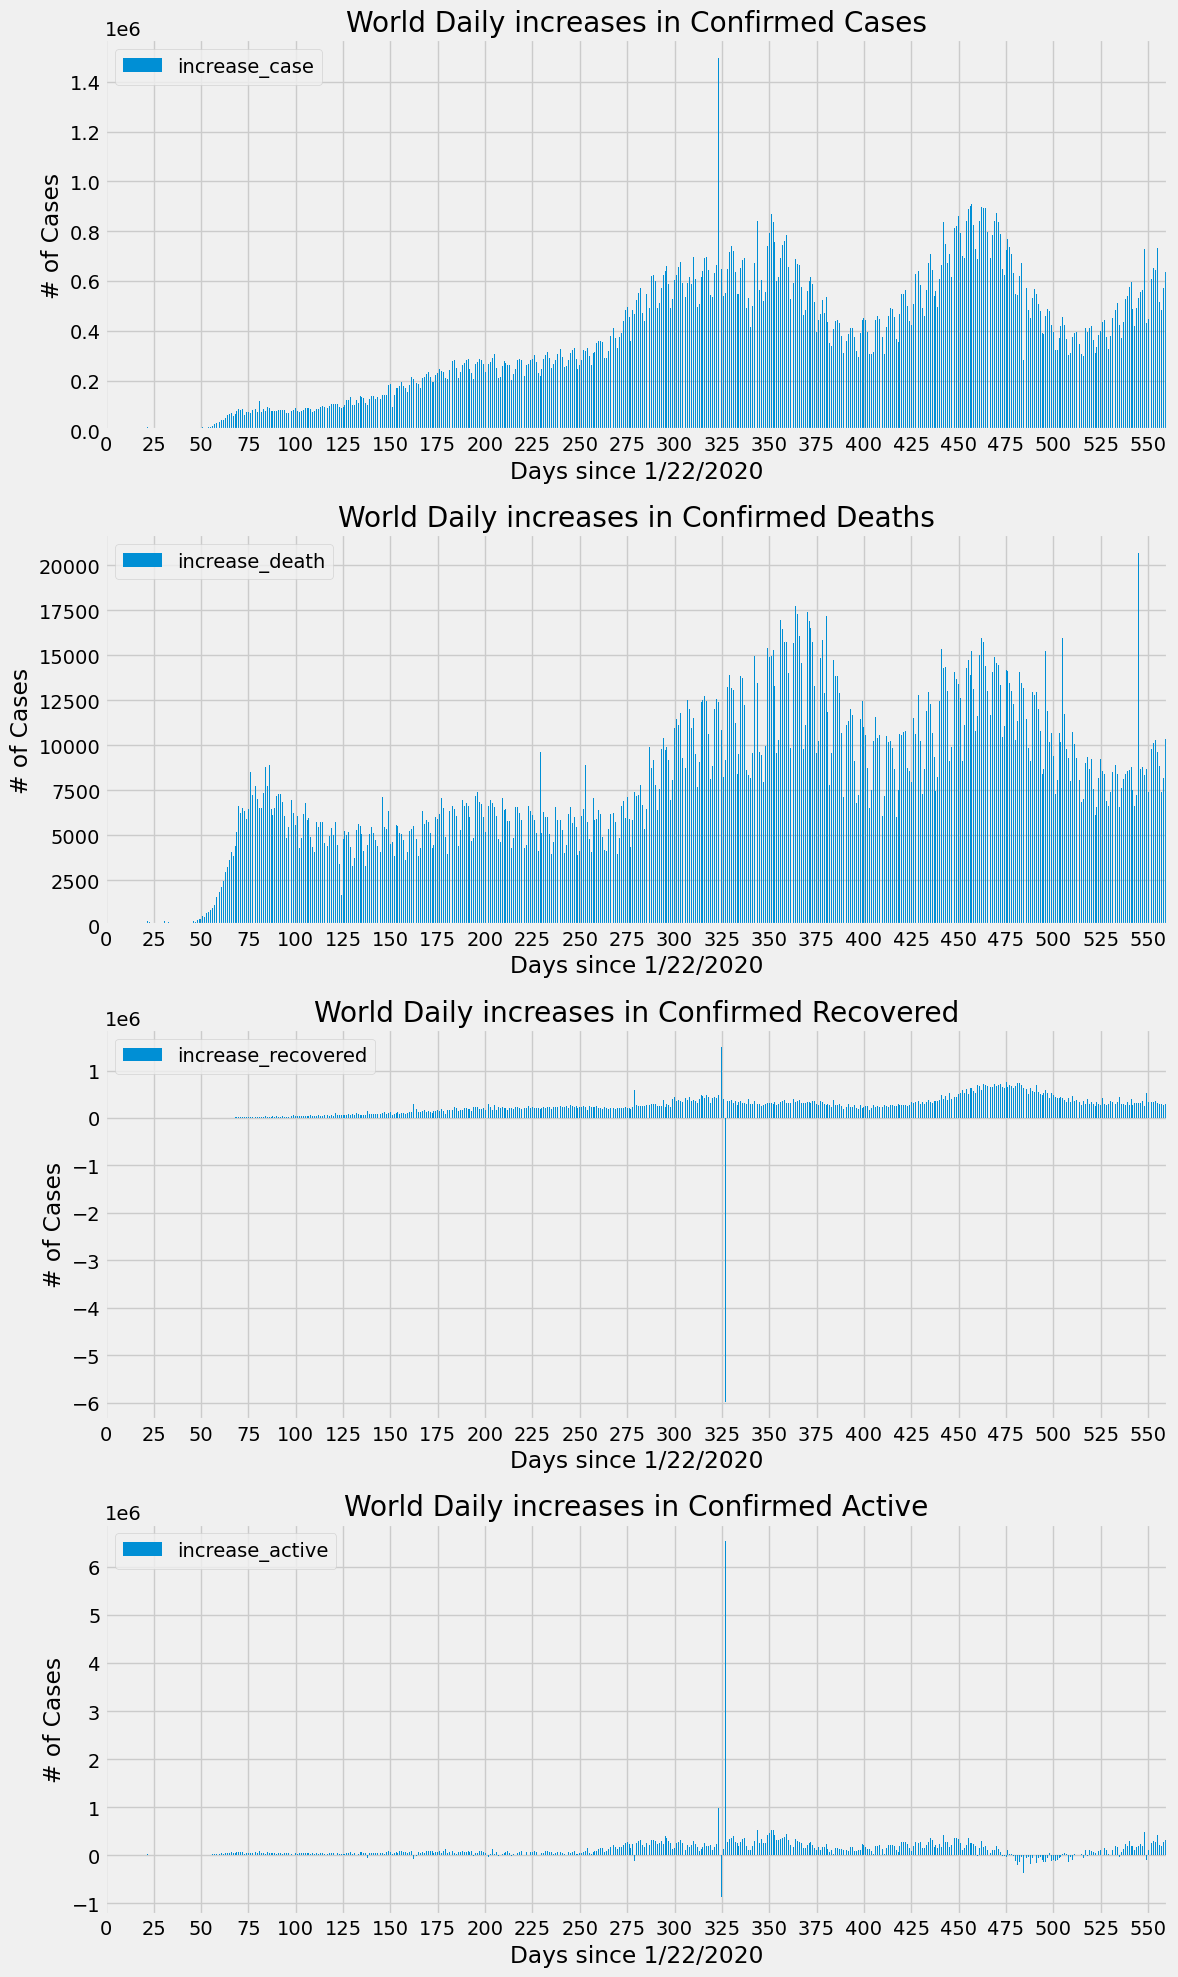

In [29]:
#Nhập mã lập trình của bạn tại đây:
# Create DataFrame
data_increase = {
    'Date': adjusted_dates,
    'increase_case': daily_increase_case,
    'increase_death': daily_increase_death,
    'increase_recovered': daily_increase_recover,
    'increase_active': daily_increase_active
}
df_increase = pd.DataFrame(data_increase)

# Plot
fig = plt.figure(figsize=(12, 20))

# Increase Cases
ax0 = fig.add_subplot(411)
df_increase.plot(kind='bar', x='Date', y='increase_case', ax=ax0)
ax0.set_title('World Daily increases in Confirmed Cases')
ax0.set_xlabel('Days since 1/22/2020')
ax0.set_ylabel('# of Cases')
ax0.legend(loc='upper left')

# Increase Deaths
ax1 = fig.add_subplot(412)
df_increase.plot(kind='bar', x='Date', y='increase_death', ax=ax1)
ax1.set_title('World Daily increases in Confirmed Deaths')
ax1.set_xlabel('Days since 1/22/2020')
ax1.set_ylabel('# of Cases')
ax1.legend(loc='upper left')

# Increase Recoveries
ax2 = fig.add_subplot(413)
df_increase.plot(kind='bar', x='Date', y='increase_recovered', ax=ax2)
ax2.set_title('World Daily increases in Confirmed Recovered')
ax2.set_xlabel('Days since 1/22/2020')
ax2.set_ylabel('# of Cases')
ax2.legend(loc='upper left')

# Increase Active
ax3 = fig.add_subplot(414)
df_increase.plot(kind='bar', x='Date', y='increase_active', ax=ax3)
ax3.set_title('World Daily increases in Confirmed Active')
ax3.set_xlabel('Days since 1/22/2020')
ax3.set_ylabel('# of Cases')
ax3.legend(loc='upper left')

# adjust x-axis
ticks = range(0, len(adjusted_dates), 25)
labels = [adjusted_dates[i] for i in ticks]
for ax in [ax0, ax1, ax2, ax3]:
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels, rotation=0)
    
plt.tight_layout()
plt.show()

# Bài toán 6:
    Tính tỷ lệ tử vong toàn cầu và tỷ lệ hồi phục theo phần trăm theo thời gian.

In [27]:
#Nhập mã lập trình của bạn tại đây:
mortality_rate = [(total_deaths[i] / total_cases[i]) * 100 for i in range(len(total_cases))]
recovery_rate = [(total_recovered[i] / total_cases[i]) * 100 for i in range(len(total_cases))]

# Bài toán 7
**7.1**

    Trực quan hóa tỷ lệ tử vong theo thời gian (đơn vị ngày) bằng biểu đồ đường.

    Sử dụng đường gạch ngang để trực quan hóa tỷ lệ tử vong trung bình mọi lúc.

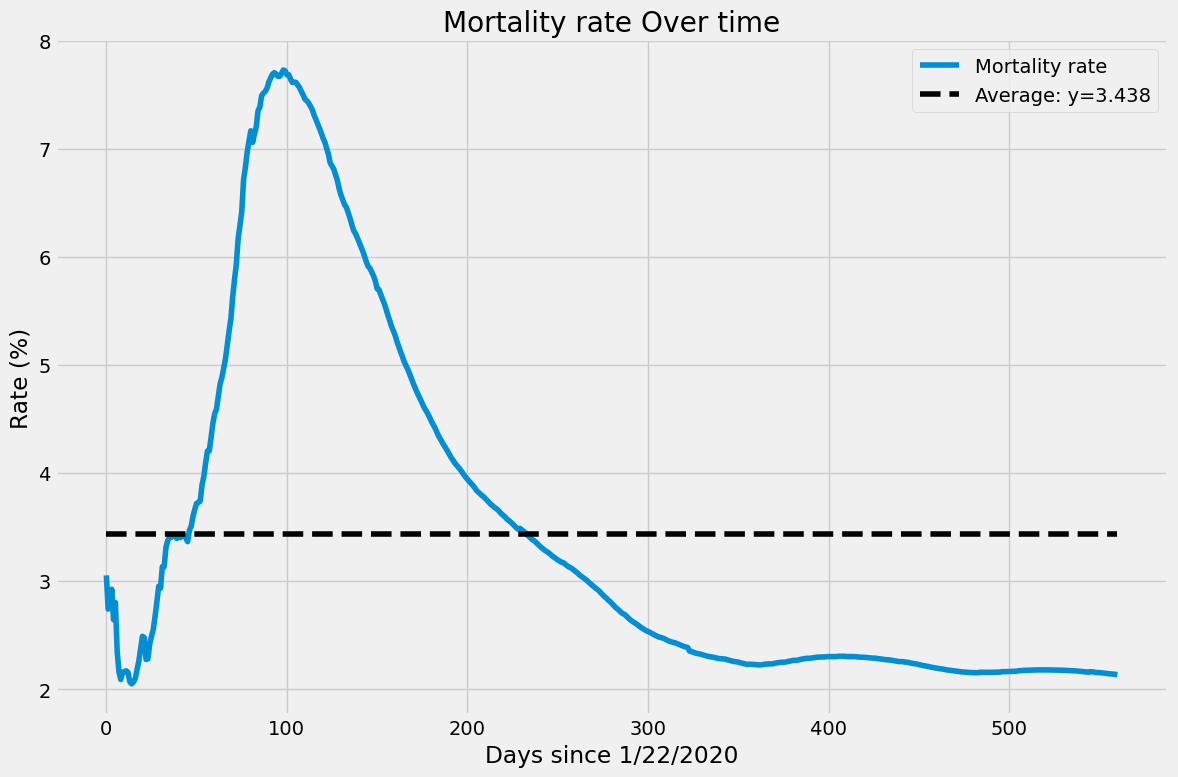

In [31]:
#Nhập mã lập trình của bạn tại đây:
avg_mortality_rate = np.mean(mortality_rate)

# Create DataFrame
data_mortality = {
    'Days': adjusted_dates,
    'Mortality rate': mortality_rate
}
df_mortality = pd.DataFrame(data_mortality)

# Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

# Plot mortality rate
df_mortality.plot(kind='line', x='Days', y='Mortality rate', ax=ax)
ax.set_title('Mortality rate Over time')
ax.set_ylabel('Rate (%)')
ax.set_xlabel('Days since 1/22/2020')
ax.legend(loc='upper right')

# Plot average_mortality_rate
ax.plot([adjusted_dates[0], adjusted_dates[-1]], [avg_mortality_rate, avg_mortality_rate], 
        color='black', linestyle='--', linewidth=4, label=f'Average: y={avg_mortality_rate:.3f}')
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

**7.2**

    Trực quan hóa tỷ lệ tử vong theo thời gian (đơn vị ngày) bằng biểu đồ đường.

    Sử dụng đường gạch ngang để trực quan hóa tỷ lệ tử vong trung bình mọi lúc.

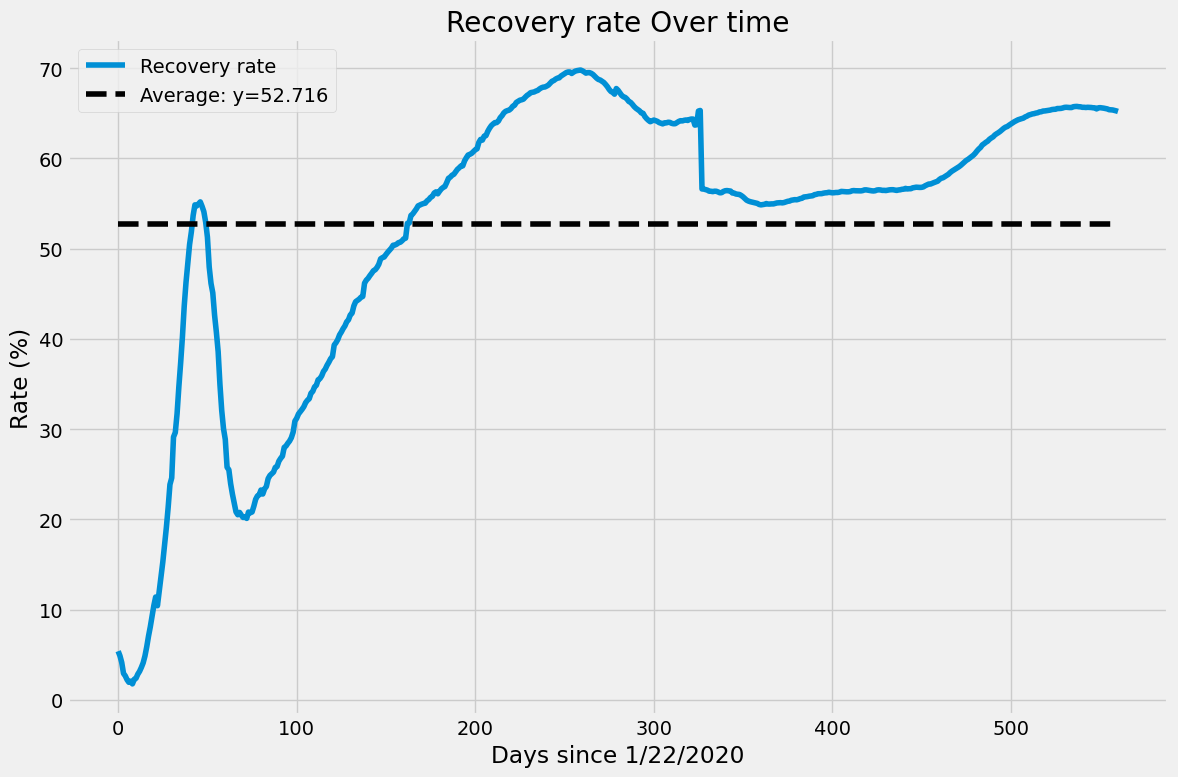

In [33]:
#Nhập mã lập trình của bạn tại đây:
avg_recovery_rate = np.mean(recovery_rate)

# Create DataFrame
data_recovery = {
    'Days': adjusted_dates,
    'Recovery rate': recovery_rate,
    'Avg': avg_recovery_rate
}
df_recovery = pd.DataFrame(data_recovery)

# Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

# Plot recovery rate
df_recovery.plot(kind='line', x='Days', y='Recovery rate', ax=ax)
ax.set_title('Recovery rate Over time')
ax.set_ylabel('Rate (%)')
ax.set_xlabel('Days since 1/22/2020')
ax.legend()

# Plot average_recovery_rate
ax.plot([adjusted_dates[0], adjusted_dates[-1]], [avg_recovery_rate, avg_recovery_rate],
        color='black', linestyle='--', linewidth=4, label=f'Average: y={avg_recovery_rate:.3f}')
ax.legend()

plt.tight_layout()
plt.show()

#  5. Phân tích theo lục địa

## Tiền xử lý dữ liệu

In [35]:
# Changing the conuntry names as required by pycountry_convert Lib
confirmed_df.loc[confirmed_df['Country/Region'] == "US", "Country/Region"] = "USA"
deaths_df.loc[deaths_df['Country/Region'] == "US", "Country/Region"] = "USA"
recoveries_df.loc[recoveries_df['Country/Region'] == "US", "Country/Region"] = "USA"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
deaths_df.loc[deaths_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
recoveries_df.loc[recoveries_df['Country/Region'] == "Korea, South", "Country/Region"] = "South Korea"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
deaths_df.loc[deaths_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
recoveries_df.loc[recoveries_df['Country/Region'] == "Taiwan*", "Country/Region"] = "Taiwan"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Kinshasa)", "Country/Region"] = "Democratic Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
deaths_df.loc[deaths_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
recoveries_df.loc[recoveries_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"

confirmed_df.loc[confirmed_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
deaths_df.loc[deaths_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
recoveries_df.loc[recoveries_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Brazzaville)", "Country/Region"] = "Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
deaths_df.loc[deaths_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
recoveries_df.loc[recoveries_df['Country/Region'] == "Bahamas, The", "Country/Region"] = "Bahamas"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
deaths_df.loc[deaths_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
recoveries_df.loc[recoveries_df['Country/Region'] == "Gambia, The", "Country/Region"] = "Gambia"

# getting all countries
countries = np.asarray(confirmed_df["Country/Region"])
countries1 = np.asarray(deaths_df["Country/Region"])
countries2 = np.asarray(recoveries_df["Country/Region"])

# Continent_code to Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America',
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Defininng Function for getting continent code for country.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'


# Bài toán 8
    Thêm trường "continent" vào tập dữ liệu confirm_df, death_df và recorveries_df:

In [97]:
#Nhập mã lập trình của bạn tại đây:
# insert Continent col into confirmed_df
list_cont_conf = []
for i in range(len(confirmed_df['Country/Region'])):
    x = confirmed_df.loc[i,'Country/Region']
    y = continents[country_to_continent_code(x)]
    list_cont_conf.append(y)
confirmed_df.insert(loc=2, column='continent', value=list_cont_conf)

# insert Continent col into deaths_df
list_cont_dea = []
for i in range(len(deaths_df['Country/Region'])):
    x = deaths_df.loc[i,'Country/Region']
    y = continents[country_to_continent_code(x)]
    list_cont_dea.append(y)
deaths_df.insert(loc=2, column='continent', value=list_cont_dea)

# insert Continent col into recoveries_df
list_cont_rec = []
for i in range(len(recoveries_df['Country/Region'])):
    x = recoveries_df.loc[i,'Country/Region']
    y = continents[country_to_continent_code(x)]
    list_cont_rec.append(y)  
recoveries_df.insert(loc=2, column='continent', value=list_cont_rec)

recoveries_df.head()

Province/State Country/Region continent       Lat       Long  1/22/20  \
0            NaN    Afghanistan      Asia  33.93911  67.709953        0   
1            NaN        Albania    Europe  41.15330  20.168300        0   
2            NaN        Algeria    Africa  28.03390   1.659600        0   
3            NaN        Andorra    Europe  42.50630   1.521800        0   
4            NaN         Angola    Africa -11.20270  17.873900        0   

   1/23/20  1/24/20  1/25/20  1/26/20  ...  7/26/21  7/27/21  7/28/21  \
0        0        0        0        0  ...    82586    82586    82586   
1        0        0        0        0  ...   130152   130166   130174   
2        0        0        0        0  ...   111322   112050   112900   
3        0        0        0        0  ...    14077    14113    14113   
4        0        0        0        0  ...    35686    35742    35964   

   7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
0    82586    82586    82586   82586   82586   82586   82586  
1   130187   130205   130222  130243  130256  130291  130314  
2   113707   114531   115276  116009  116770  117557  118409  
3    14180    14210    14210   14210   14296   14348   14380  
4    36025    36708    37255   37397   38360   39389   39582  

[5 rows x 566 columns]

# Bài toán 9
    Tạo khung dữ liệu country_df với chỉ mục là trường "Country/Region".
    Các thông tin cột này sẽ là:
    - continent: Lục địa của quốc gia.
    - Cases: Tổng số ca dương tính.
    - Deaths: Tổng số người chết.
    - Recoveries: Tổng số ca hồi phục
    - Active: Tổng số đang điều trị.
    - Mortality Rate: Tỉ lệ tử vong tính theo phần trăm.

In [49]:
#Nhập mã lập trình của bạn tại đây:
data_country = {
    'Country/Region': confirmed_df['Country/Region'],
    'Continent': list_cont_conf,
    'Total Cases': confirmed_df.iloc[:, -1],
    'Total Deaths': deaths_df.iloc[:, -1],
    'Total Recoveries': recoveries_df.iloc[:, -1],
    'Total Active': confirmed_df.iloc[:, -1] - deaths_df.iloc[:, -1] - recoveries_df.iloc[:, -1],
    'Mortality Rate': (deaths_df.iloc[:, -1]/confirmed_df.iloc[:, -1])*100
}
country_df = pd.DataFrame(data_country).set_index('Country/Region')
country_df.head()

Continent  Total Cases  Total Deaths  Total Recoveries  \
Country/Region                                                          
Afghanistan         Asia       148933          6836           82586.0   
Albania           Europe       133310          2457          130314.0   
Algeria           Africa       176724          4404          118409.0   
Andorra           Europe        14797           128           14380.0   
Angola            Africa        43158          1026           39582.0   

                Total Active  Mortality Rate  
Country/Region                                
Afghanistan          59511.0        4.589983  
Albania                539.0        1.843073  
Algeria              53911.0        2.492021  
Andorra                289.0        0.865040  
Angola                2550.0        2.377311

# Bài toán 10
    Tạo khung dữ liệu Continental_df với chỉ mục là trường "continent".
    Các thông tin cột này sẽ là:
     - Continent: 
     - Confirmed: Đất nước lục địa.
     - Deaths: Tổng số người chết.
     - Recoveries: Tổng số lần khôi phục.
     - Active: Tổng số đang điều trị.
     - Mortality Rate: Tỷ lệ tử vong tính theo phần trăm.

In [57]:
#Nhập mã lập trình của bạn tại đây:
continent_list = list(continents.values())
continent_list.sort()

data_continental = {
    'Continent': continent_list,
    'Total Cases': confirmed_df.drop(['Lat', 'Long'], axis=1).groupby('Continent').sum().iloc[:, -1],
    'Total Deaths': deaths_df.drop(['Lat', 'Long'], axis=1).groupby('Continent').sum().iloc[:, -1],
    'Total Recoveries': recoveries_df.drop(['Lat', 'Long'], axis=1).groupby('Continent').sum().iloc[:, -1],
    'Total Active': (confirmed_df.drop(['Lat', 'Long'], axis=1).groupby('Continent').sum().iloc[:, -1] -
                    deaths_df.drop(['Lat', 'Long'], axis=1).groupby('Continent').sum().iloc[:, -1] -
                    recoveries_df.drop(['Lat', 'Long'], axis=1).groupby('Continent').sum().iloc[:, -1]
                    ),
    'Mortality Rate': (deaths_df.drop(['Lat', 'Long'], axis=1).groupby('Continent').sum().iloc[:, -1] /
                        confirmed_df.drop(['Lat', 'Long'], axis=1).groupby('Continent').sum().iloc[:, -1]) *100
}
continental_df = pd.DataFrame(data_continental).set_index('Continent')
continental_df

Total Cases  Total Deaths  Total Recoveries  Total Active  \
Continent                                                                  
Africa             6855602        174000           5955131        726471   
Asia              62536726        902952          57853343       3780431   
Australia            90000          1425             55290         33285   
Europe            52448545       1167140          27947075      23334330   
North America     42351963        924518           5776939      35650506   
Others              753558         16614            654615         82329   
South America     35722194       1096367          32656668       1969159   

               Mortality Rate  
Continent                      
Africa               2.538070  
Asia                 1.443875  
Australia            1.583333  
Europe               2.225305  
North America        2.182940  
Others               2.204741  
South America        3.069148

## Biểu đồ đường mẫu
Dưới đây là các hàm mẫu để trực quan hóa các trường hợp sinh động theo thời gian ở mỗi châu lục / quốc gia:

In [43]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')

    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})

    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)

def visualize_covid_cases(confirmed, deaths,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)

    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else:
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]

    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"

    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))

    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]

    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)

    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})

    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)

    if figure == None:
        plt.show()



# Bài toán 11
**11.1**

  Áp dụng hàm visual_covid_case để hiển thị trực quan hóa về Covid của 7 lục địa trong 7 biểu đồ đường được riêng biệt. Thứ tự hiển thị được sắp xếp theo thứ tự giảm dần theo số ca được xác nhận.
    

<Figure size 640x480 with 0 Axes>

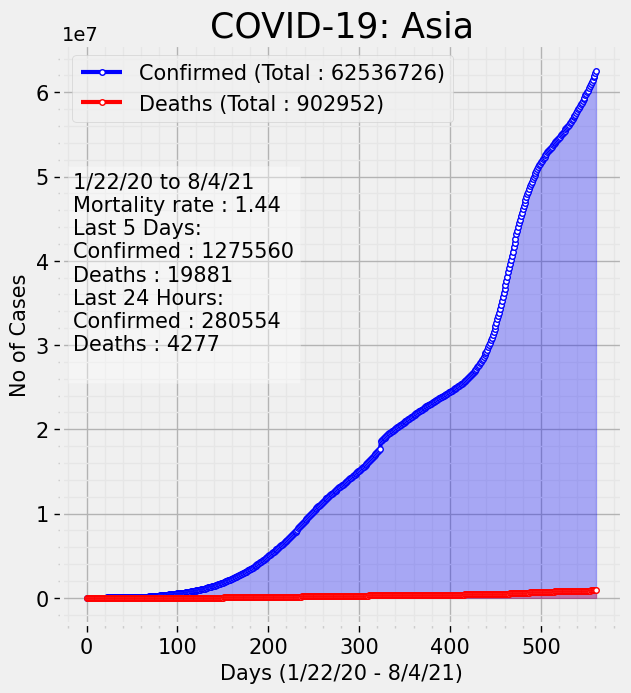

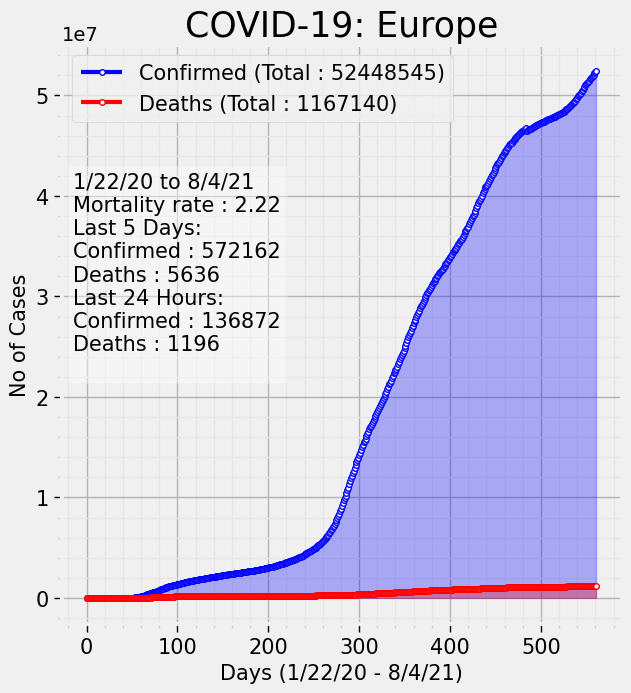

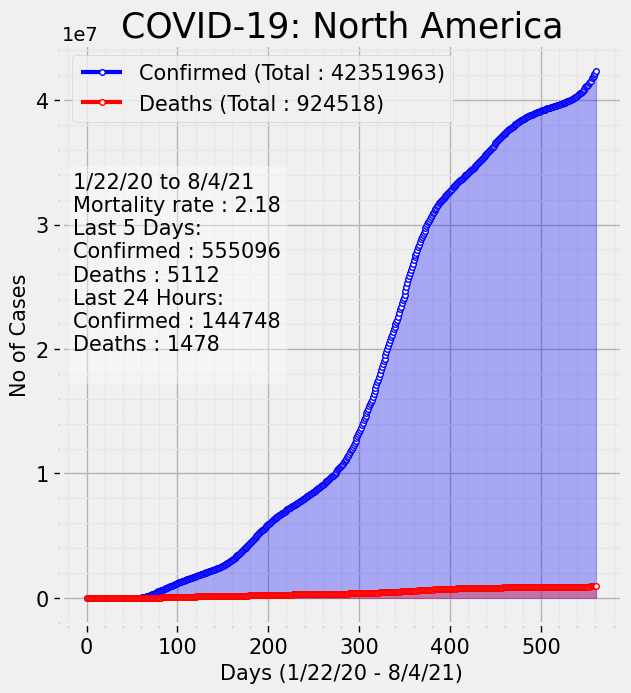

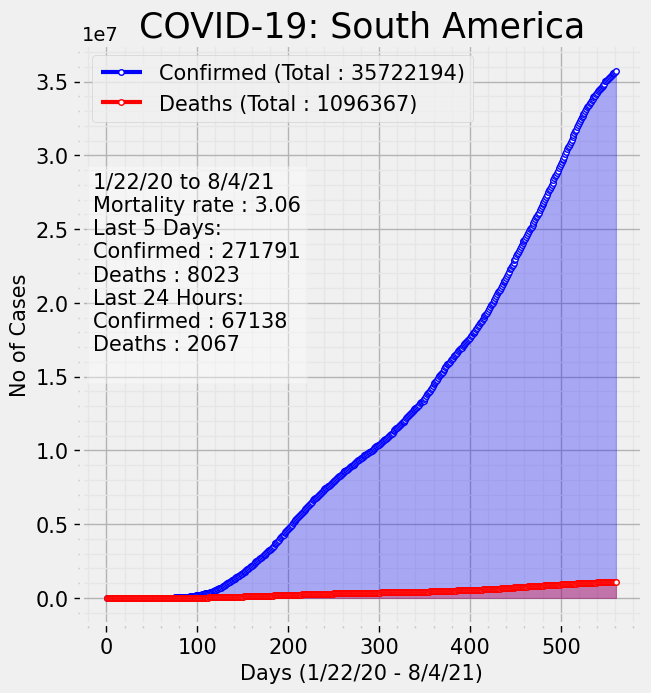

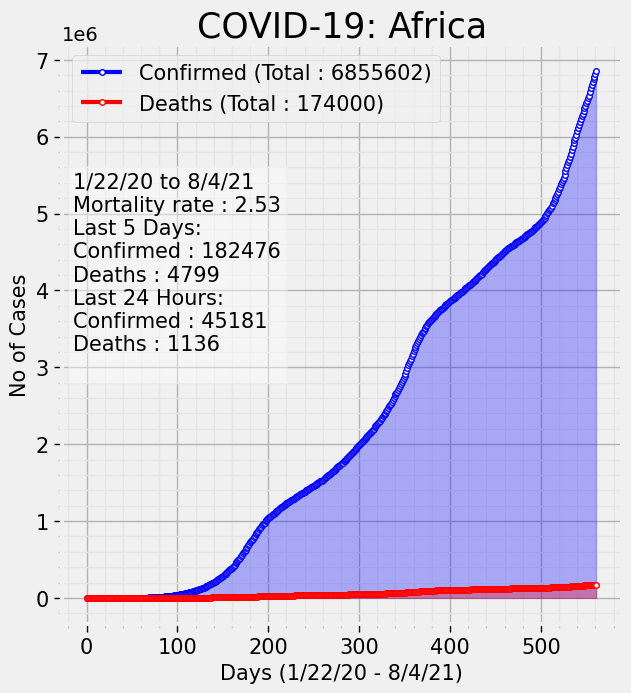

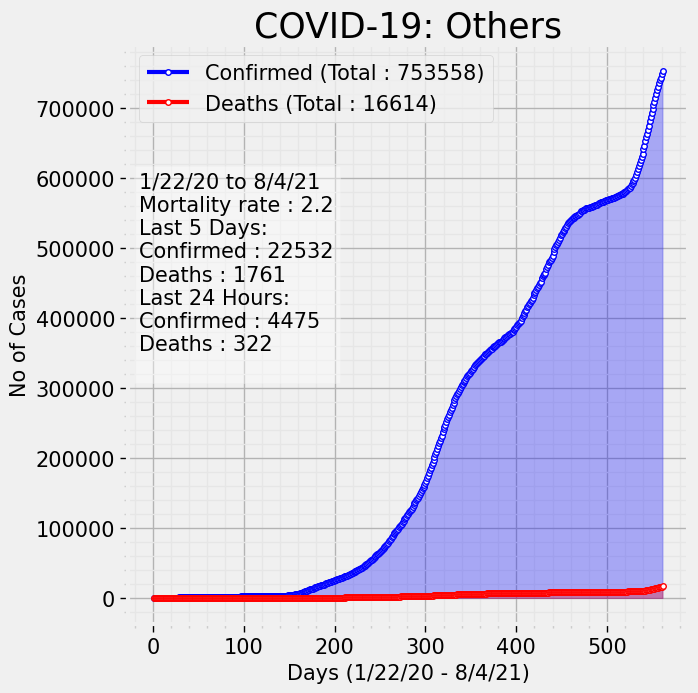

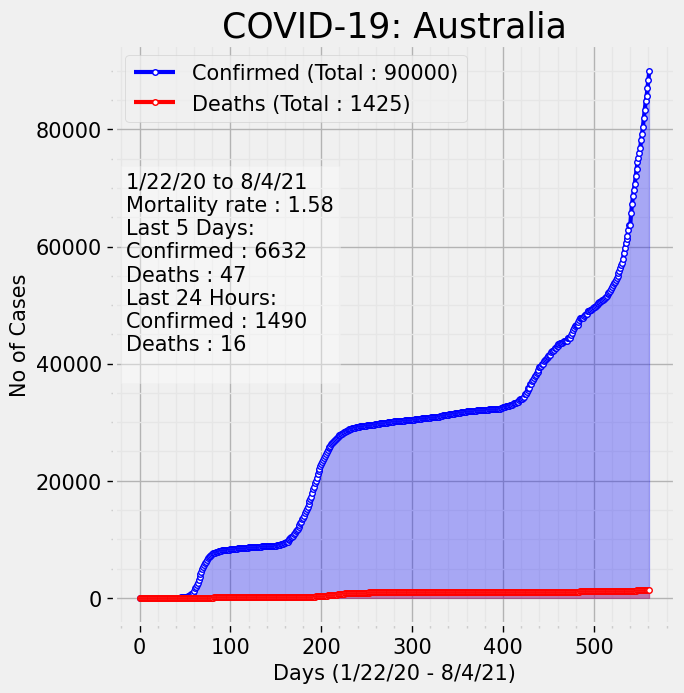

<Figure size 640x480 with 0 Axes>

In [111]:
#Nhập mã lập trình của bạn tại đây:
# Sort the continents by total cases in descending order
sorted_continents = continental_df.sort_values(by='Total Cases', ascending=False).index

# Create subplots for each continent
fig = plt.figure()
for i, continent in enumerate(sorted_continents):
    visualize_covid_cases(confirmed_df, deaths_df, continent=continent)

plt.tight_layout()
plt.show()


**11.2**

    Sử đổi "plot_params" và hàm "visualize_covid_cases" để:
    - Hiển thị kết quả của 7 ngày gần nhất thay vì 5 ngày.
     - Thêm "Recoveries line" vào biểu đồ chính.
     - Thêm số "Total Recoveries" vào bảng nhỏ.
     - Thêm "Recoveries" được nộp trong 7 ngày và 24 giờ qua vào menu thông tin.

<Figure size 640x480 with 0 Axes>

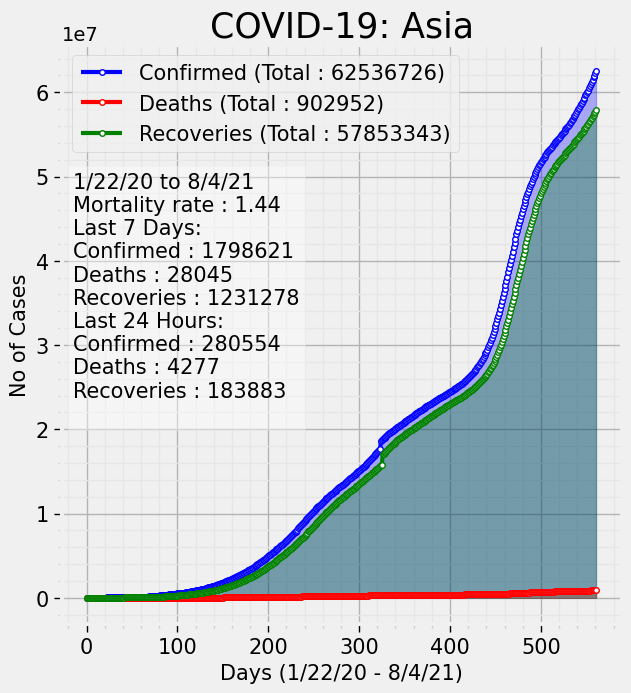

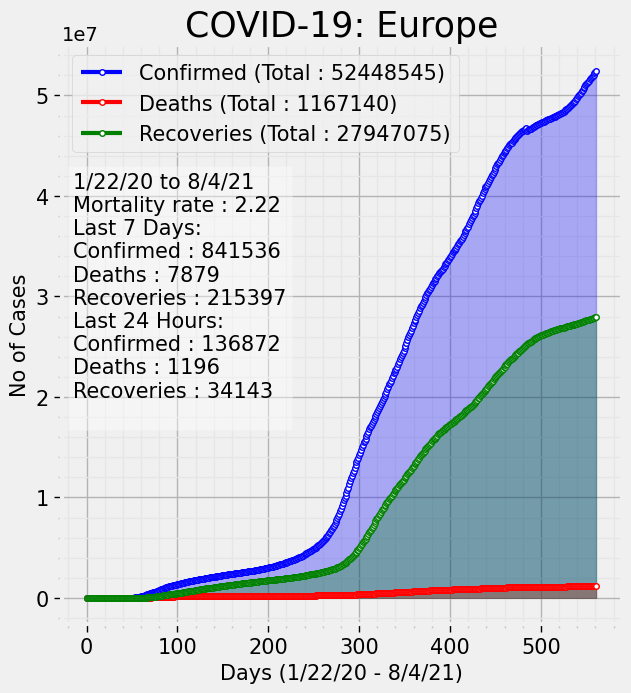

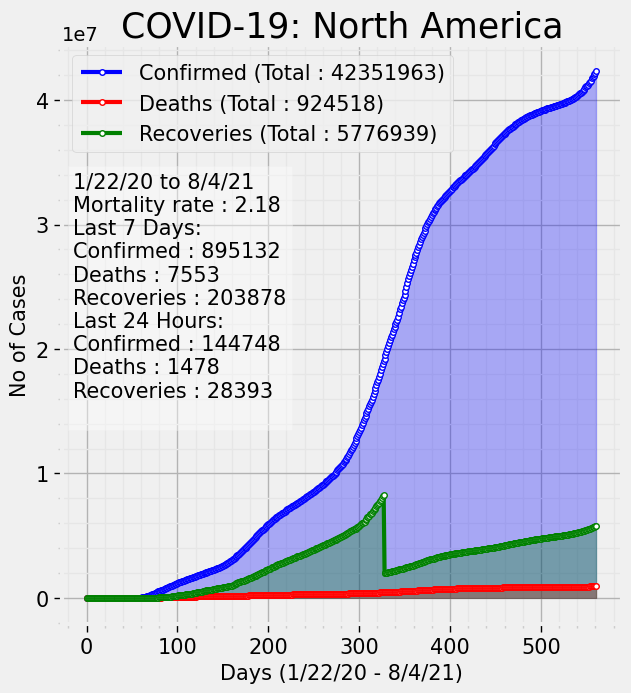

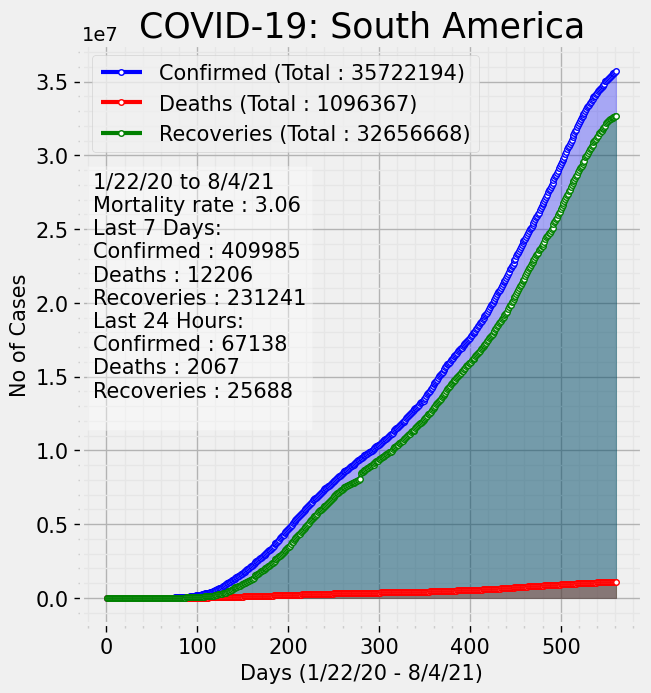

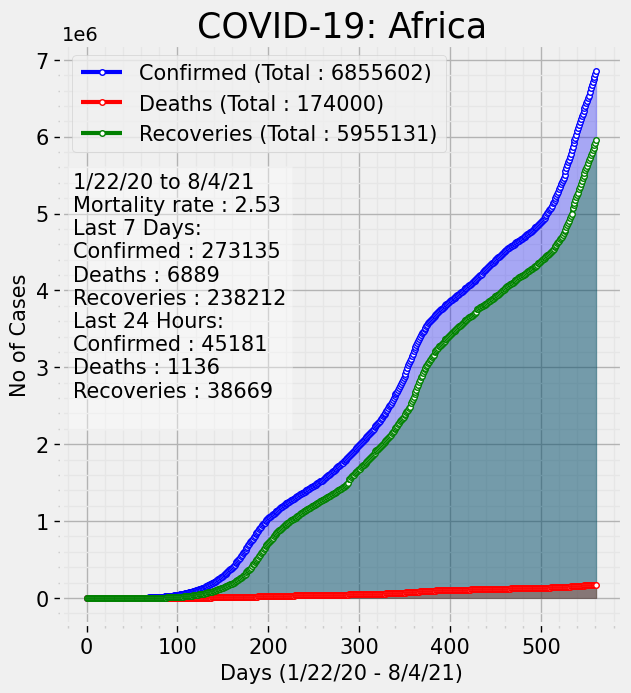

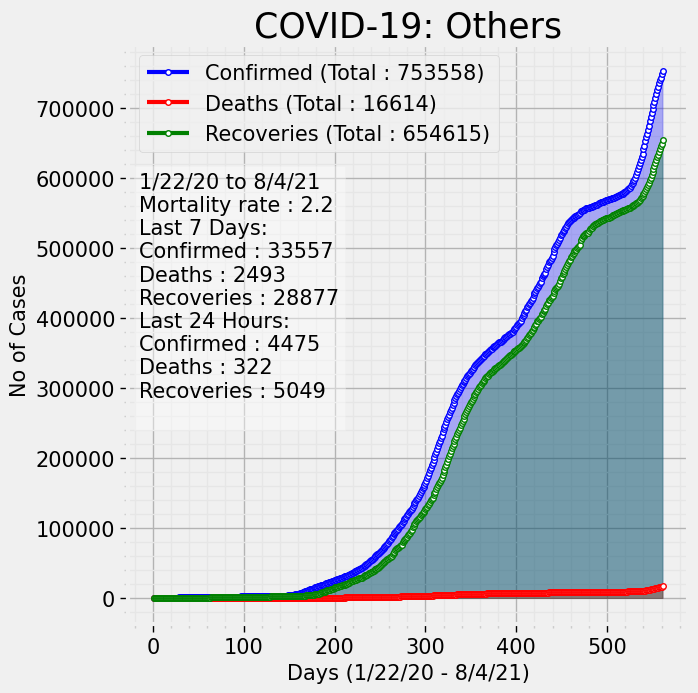

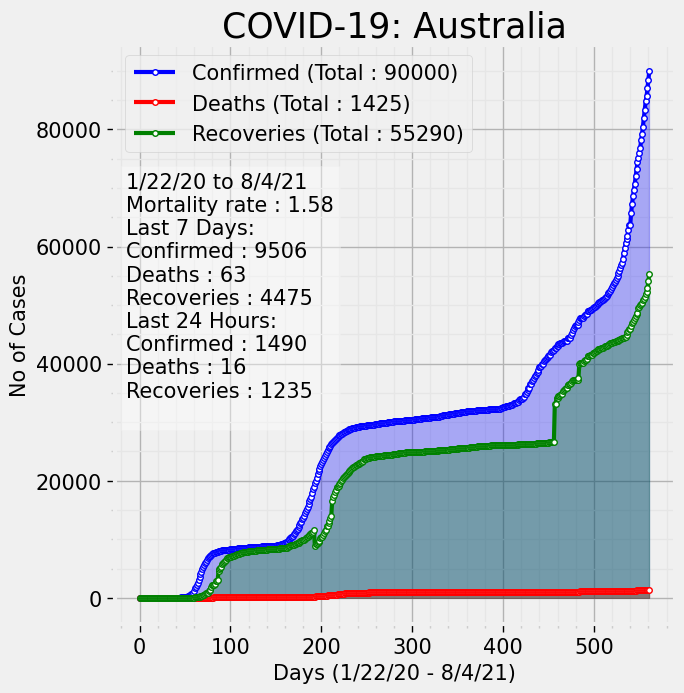

<Figure size 640x480 with 0 Axes>

In [119]:
#Nhập mã lập trình của bạn tại đây:

def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')

    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})

    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)

def visualize_covid_cases(confirmed, deaths, recoveries,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)

    stats = [confirmed, deaths, recoveries]
    label = ["Confirmed", "Deaths", "Recoveries"]
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else:
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[2].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[2][stats[2][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]

    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 7 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-8])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-8])+"\n"
    text += "Recoveries : " + str(Total_recoveries[-1] - Total_recoveries[-8])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    text += "Recoveries : " + str(Total_recoveries[-1] - Total_recoveries[-2])+"\n"

    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))

    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]

    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)

    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})

    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)

    if figure == None:
        plt.show()

sorted_continents = continental_df.sort_values(by='Total Cases', ascending=False).index
# Create subplots for each continent
fig = plt.figure()
for i, continent in enumerate(sorted_continents):
    visualize_covid_cases(confirmed_df, deaths_df, recoveries_df, continent=continent)

plt.tight_layout()
plt.show()

# Bài toán 12
    Trực quan hóa ma trận tương quan của continents_df.

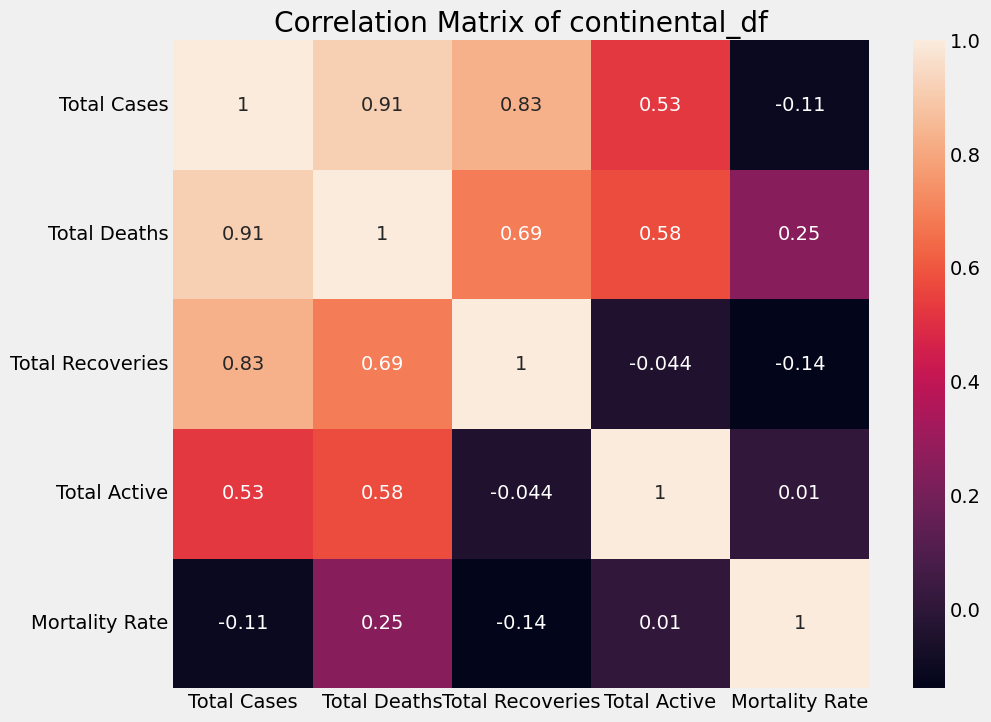

In [127]:
#Nhập mã lập trình của bạn tại đây:
correlation_matrix = continental_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix of continental_df')
plt.xticks(rotation=0)
plt.show()

# Bài toán 13
    Xây dựng biểu đồ hình tròn để so sánh tỷ lệ số ca dương tính, số người chết, số người khỏi bệnh và đang điều trị của 7 lục địa.
    Mỗi trường (xác nhận, tử vong, ...) nên được trình bày trong các biểu đồ hình tròn khác nhau.
    Bạn không được phép sử dụng đoạn mã lặp lại ở đây, hãy thử sử dụng vòng lặp for.
    Mỗi lục địa nên được trình bày bằng các màu sắc khác nhau.

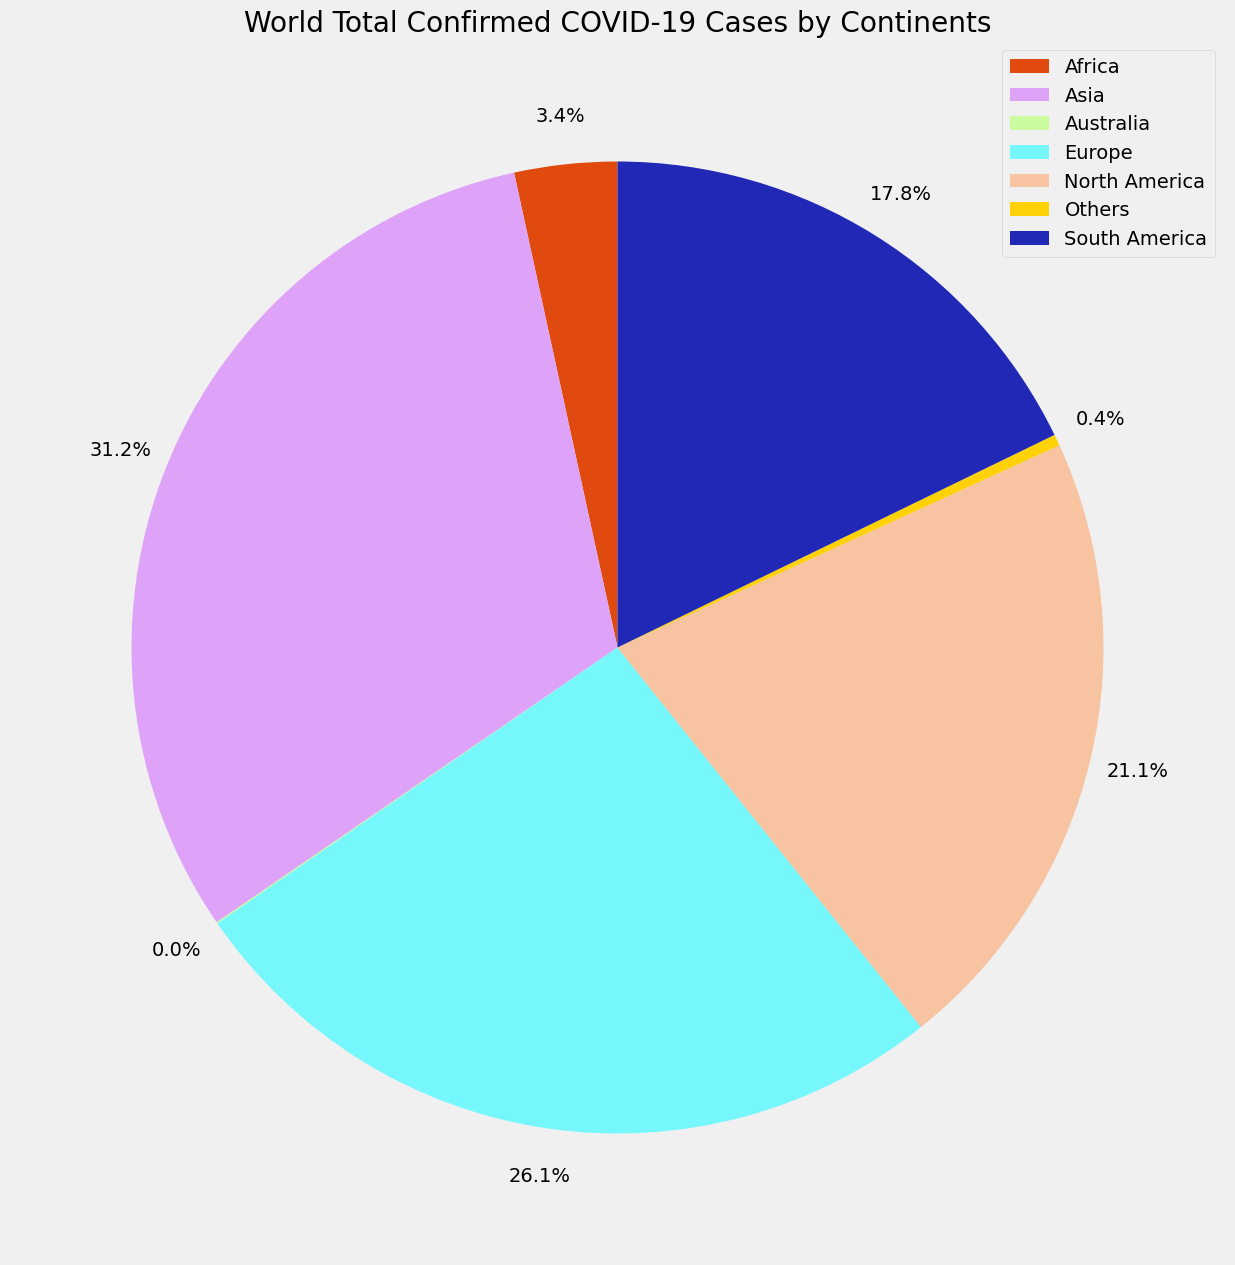

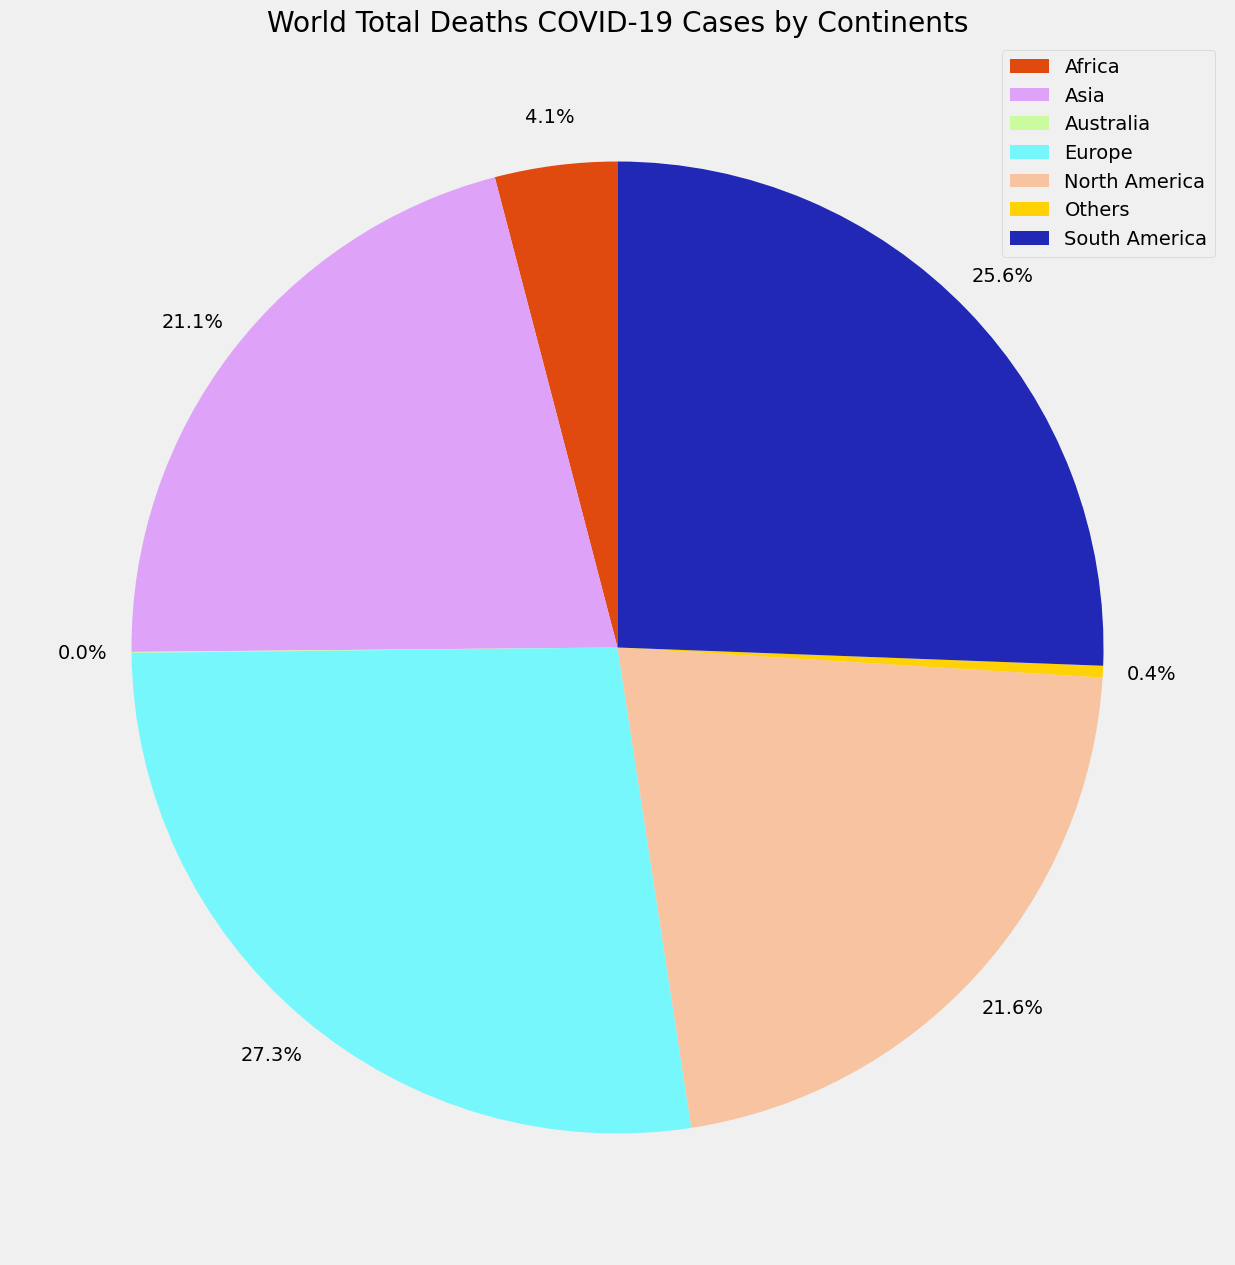

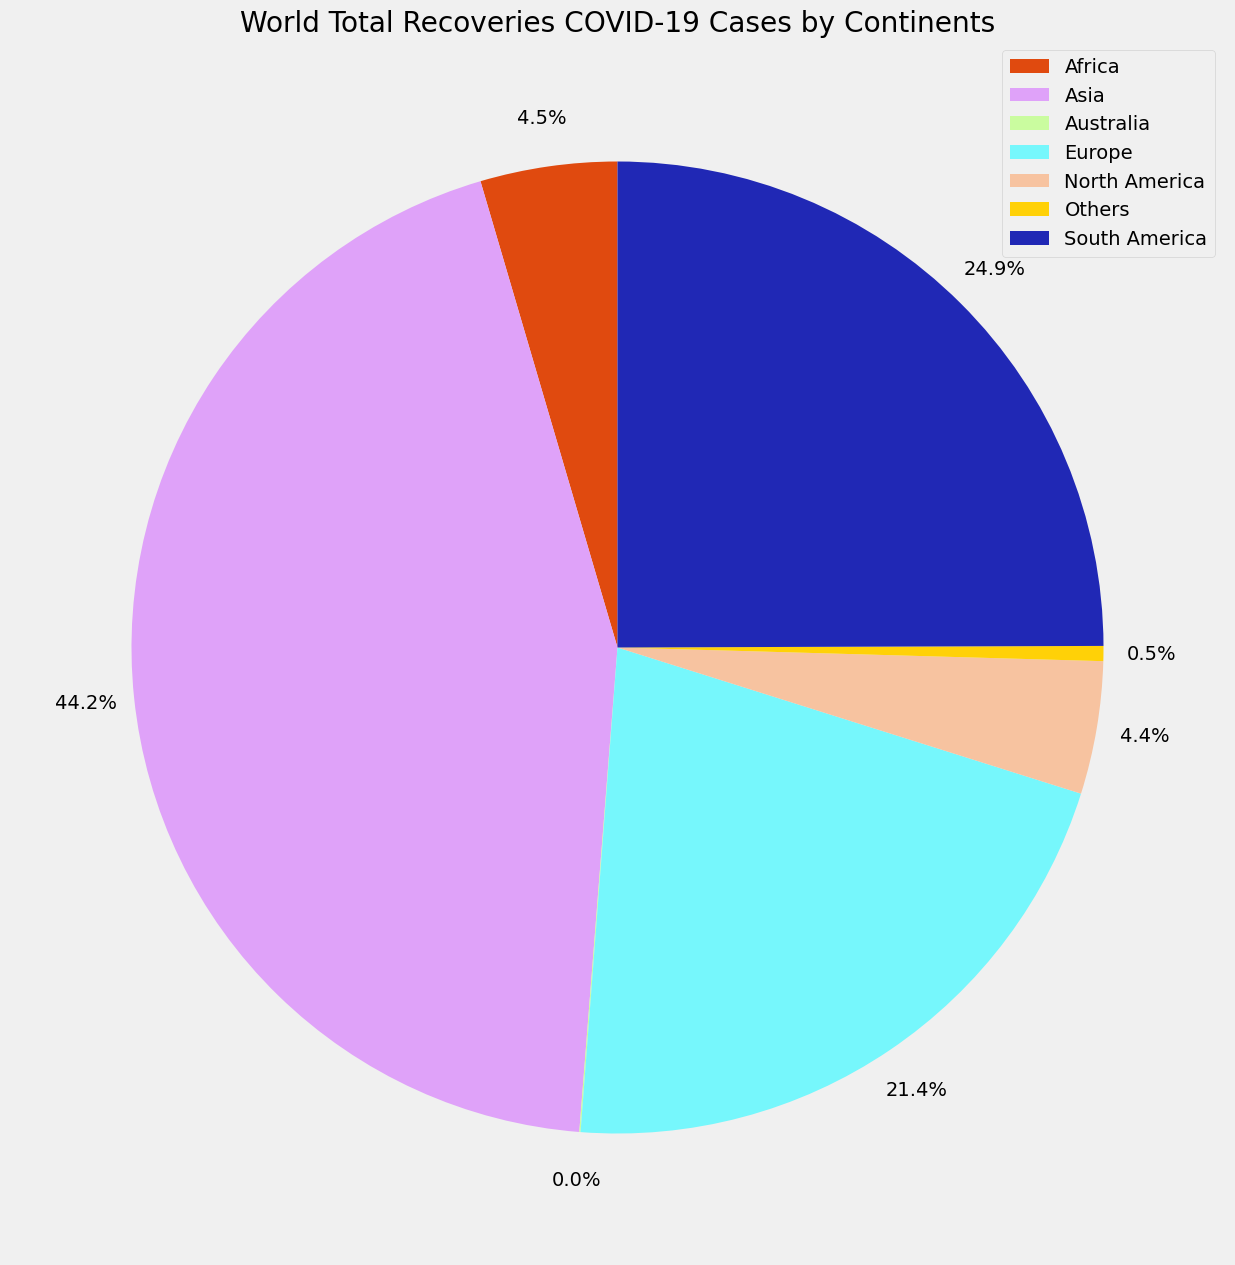

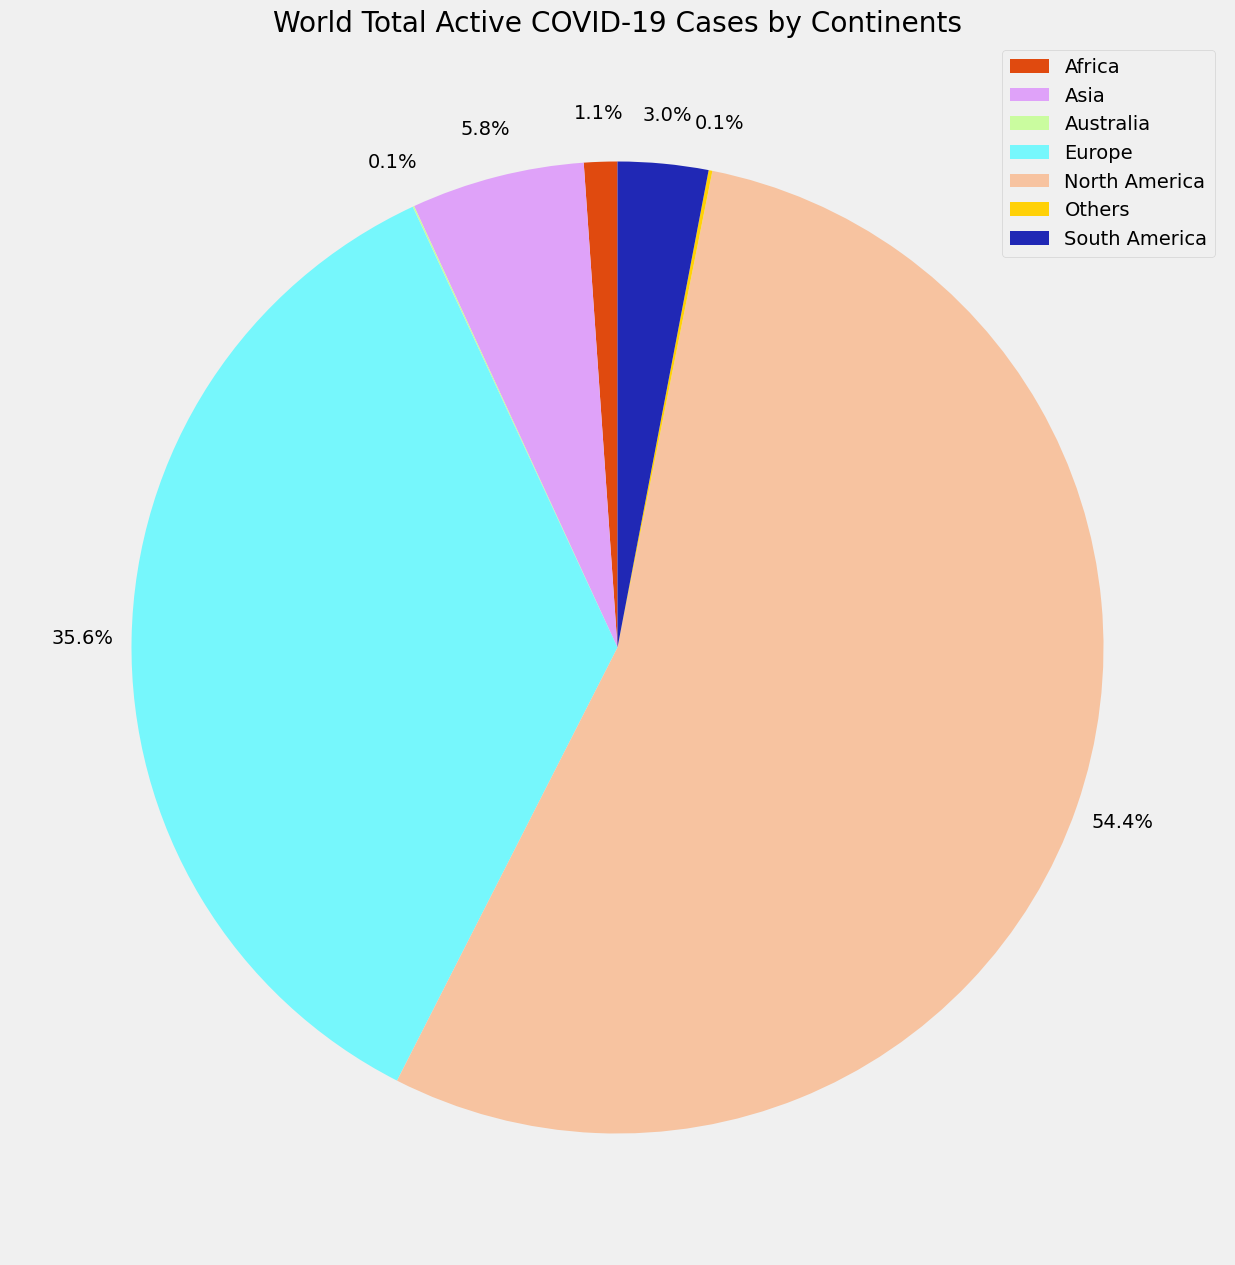

In [199]:
#Nhập mã lập trình của bạn tại đây:
data_columns = ['Total Cases', 'Total Deaths', 'Total Recoveries', 'Total Active']
titles = ['World Total Confirmed COVID-19 Cases by Continents',
          'World Total Deaths COVID-19 Cases by Continents',
          'World Total Recoveries COVID-19 Cases by Continents',
          'World Total Active COVID-19 Cases by Continents']
colors = ['#e04a0f','#dfa2f9','#cafc9f','#76f7fc','#f7c3a0','#ffd107','#2028b5']

for i, col in enumerate(data_columns):
    plt.figure(figsize=(15, 15))
    plt.pie(continental_df[col], labels=None, autopct='%1.1f%%', pctdistance=1.1, startangle=90, colors=colors)
    plt.title(titles[i])
    plt.legend(loc='upper right', labels=continental_df.index)
    plt.show()

# 6. Phân tích theo quốc gia

# Bài toán 14
    Xây dựng bản đồ folium để hiển thị số người được xác nhận, tử vong, phục hồi và tỷ lệ tử vong của mỗi quốc gia dựa trên vị trí của các quốc gia. Bán kính của hình tròn tỷ lệ thuận với số lượng xác nhận.
![title](problem14.png)

In [ ]:
#Nhập mã lập trình của bạn tại đây:
m = folium.Map(location=[0, 0], zoom_start=2)
for idx, row in prob14.iterrows():
    folium.Circle(
        location=[row['Lat'], row['Long']],
        radius=row['Total Cases']/10,
        color='orange',
        fill=True,
        fill_opacity=0.4,
        tooltip=f"<b>{idx}</b><br>"
                f"Confirm: {row['Total Cases']}<br>"
                f"Deaths: {row['Total Deaths']}<br>"
                f"Recovered: {row['Total Recoveries']}<br>"
                f"Mortality Rate: {row['Mortality Rate']:.2f}"
).add_to(m)

m.save('prob14result.html')
m

# Bài toán 15
Xây dựng một bản đồ px [(plotly.express)](https://plotly.com/python/plotly-express/) để hiển thị số lượng hoạt động của mỗi quốc gia trong log(10) dựa trên tên của các quốc gia bằng cách sử dụng màu "spectral" (quang phổ).

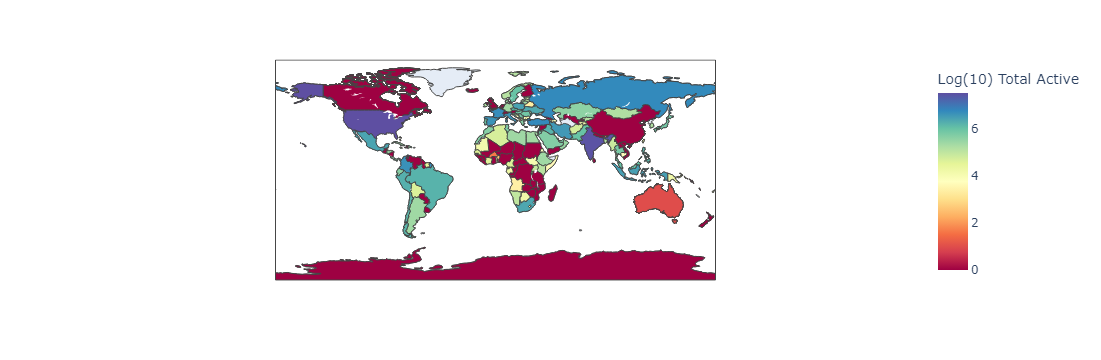

In [312]:
#Nhập mã lập trình của bạn tại đây:

country_df['Log_Total_Active'] = country_df['Total Active'].apply(lambda x: np.log10(x) if x>0 else 0)

fig = px.choropleth(
    country_df.reset_index(),
    locations='Country/Region',
    locationmode='country names',
    color='Log_Total_Active',
    color_continuous_scale='spectral',
    labels={'Log_Total_Active': 'Log(10) Total Active'}
)

fig.show()

# Bài toán 16
    Lọc 10 quốc gia hàng đầu dựa trên số ca dương tính.

In [318]:
#Nhập mã lập trình của bạn tại đây:
top_10_countries = country_df.sort_values(by='Total Cases', ascending=False).head(10)
top_10_countries

Continent  Total Cases  Total Deaths  Total Recoveries  \
Country/Region                                                               
USA             North America     35460776        611222               0.0   
India                    Asia     31812114        426290          105688.0   
Brazil          South America     20034407        559944        17771228.0   
Russia                 Europe      6274006        159032          253972.0   
France                 Europe      6111503        110972          749773.0   
United Kingdom         Europe      5952756        156911               NaN   
Turkey                   Asia      5822487         51767               0.0   
Argentina       South America      4975616        106747         4615834.0   
Colombia        South America      4815063        121695             209.0   
Spain                  Europe      4545184         81844           32454.0   

                Total Active  Mortality Rate  Log_Total_Active  
Country/Region                                                  
USA               34849554.0        1.723657          7.542197  
India             31280136.0        1.340024          7.495269  
Brazil             1703235.0        2.794912          6.231275  
Russia             5861002.0        2.534776          6.767972  
France             5250758.0        1.815789          6.720222  
United Kingdom           NaN        2.635939          0.000000  
Turkey             5770720.0        0.889087          6.761230  
Argentina           253035.0        2.145403          5.403181  
Colombia           4693159.0        2.527381          6.671465  
Spain              4430886.0        1.800675          6.646491

# Bài toán 17
    Trực quan hóa 10 quốc gia hàng đầu đã được xác nhận với số ca đang điều trị, khỏi bệnh và tử vong bằng cách sử dụng biểu đồ cột chồng.
![title](problem17.png)

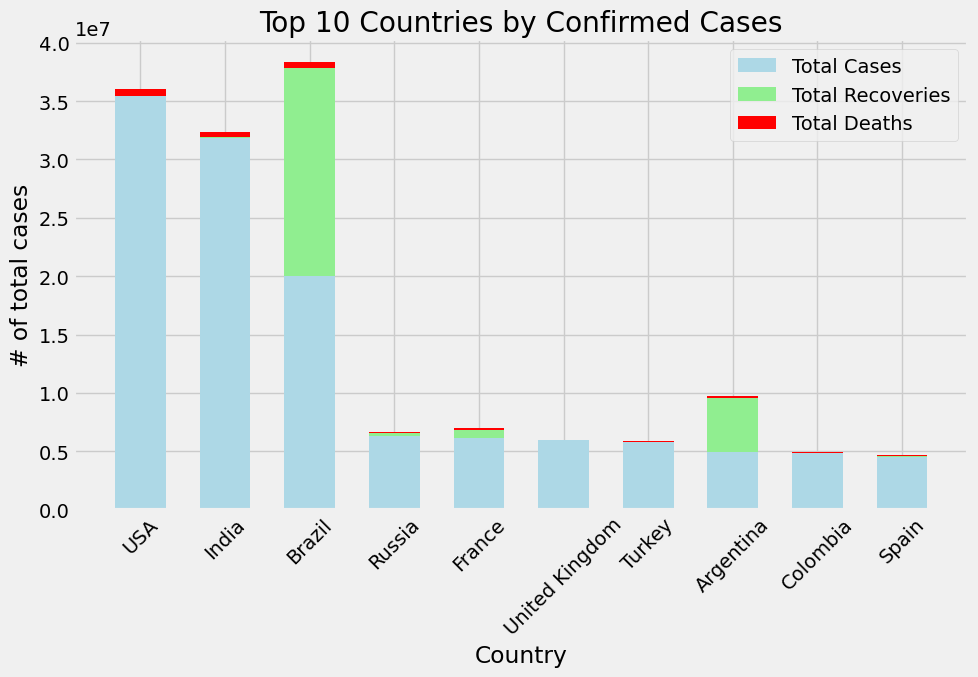

In [376]:
#Nhập mã lập trình của bạn tại đây:
t10_countries = list(top_10_countries.index)
t10_cases = top_10_countries['Total Cases']
t10_deaths = top_10_countries['Total Deaths']
t10_recoveries = top_10_countries['Total Recoveries']

fig, ax = plt.subplots(figsize=(10, 7))

# Vẽ biểu đồ cột chồng
bar_width = 0.6
bar1 = ax.bar(t10_countries, t10_cases, color='lightblue', label='Total Cases', width=bar_width)
bar2 = ax.bar(t10_countries, t10_recoveries, bottom=t10_cases, color='lightgreen', label='Total Recoveries', width=bar_width)
bar3 = ax.bar(t10_countries, t10_deaths, bottom=t10_cases+t10_recoveries, color='red', label='Total Deaths', width=bar_width)

# Thêm tiêu đề và nhãn trục
ax.set_title('Top 10 Countries by Confirmed Cases')
ax.set_xlabel('Country')
ax.set_ylabel('# of total cases')
ax.legend()

# Hiển thị biểu đồ
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 7. Phân tích nâng cao


# Bài toán 18
    Dựa trên dữ liệu trực quan trên toàn cầu, dịch COVID 2019 trên thế giới đã đạt đến đỉnh điểm chưa?
    Đặt câu trả lời của bạn ở đây:
     

    Dựa trên các thông tin về covid19 trên toàn thế giới, dấu hiệu của covid chưa có xu hướng giảm.
    Cụ thể, gia tăng hàng ngày về tổng số ca nhiễm bệnh và ca tử vong vẫn còn cao, chưa thuyên giảm.
    Tin tốt là tỷ lệ tử vong (mortality rate) đang có xu hướng giảm, đồng thời tỷ lệ phục hồi (recovery rate) cũng đang ở mức cao.

# Bài toán 19:
Dựa trên hình ảnh dữ liệu trên phần lục địa:

    19.1 Châu lục nào có tỷ lệ tử vong cao nhất so với các trường hợp dương tính của các châu lục?

    19.2 Châu lục nào có tỷ lệ lây lan COVID 2019 cao nhất so với các trường hợp dương tính của các châu lục?
    
    19.3 Châu lục nào có tỷ lệ khỏi bệnh cao nhất trong tập dữ liệu của các lục địa?

(Lưu ý: Tỷ lệ chênh lệch COVID 2019 = Số lượng ca mới được xác nhận trong 10 ngày qua / số ca dương tính trước đó).
Đặt câu trả lời của bạn ở đây:


    Châu lục có tỷ lệ tử vong (mortality rate) cao nhất là: Châu Nam Mỹ - South America (3.06)
    Châu lục có tỷ lệ lây lan COVID 2019 cao nhất là: Châu Á - Asia (confirmed cases in last 7 days: 1798621)
    Châu lục có tỷ lệ khỏi bệnh cao nhất là: Châu Á - Asia (recoveries/ confirmed = 57853343/ 62536726)

# Bài toán 20
Dựa trên trực quan hóa dữ liệu theo quốc gia:

    20.1Quốc gia nào có tỷ lệ tử vong cao nhất trong tập dữ liệu của các quốc gia?

    20.2 Quốc gia nào có tỷ lệ lan truyền COVID 2019 cao nhất trong tập dữ liệu các quốc gia?
    
    20.3 Quốc gia nào có tỷ lệ khỏi bệnh cao nhất trong tập dữ liệu của các quốc gia?
Nhập câu trả lời của bạn ở đây:

    Quốc gia có tỷ lệ tử vong (mortality rate) cao nhất là: Brazil (2.79)
    Quốc gia có tỷ lệ lây lan COVID 2019 cao nhất là: Mỹ
    Quốc gia có tỷ lệ khỏi bệnh cao nhất là: Brazil

# Bài toán 21
**Tập dữ liệu USA**

In [11]:
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/07-06-2020.csv')

Dựa trên dữ liệu của Mỹ:

    21.1 Tiểu bang nào có tỷ lệ tử vong cao nhất trong tập dữ liệu của các tiểu bang?
    21.2 Tiểu bang nào có tỷ lệ lan truyền COVID 2019 cao nhất trong tập dữ liệu của các tiểu bang?
    
    21.3 Tiểu bang nào có tỷ lệ khỏi bệnh cao nhất trong tập dữ liệu của các tiểu bang?

    Tiểu bang có tỷ lệ tử vong cao nhất là: Connecticut (9.23)
    Tiểu bang có tỷ lệ lan truyền COVID 2019 cao nhất là: New York
    Tiểu bang có tỷ lệ khỏi bệnh cao nhất là: Minnesota (87.91)
    

In [449]:
#Nhập mã lập trình của bạn tại đây:
us_medical_data.sort_values(by='Mortality_Rate', ascending=False).head(3)

Province_State Country_Region          Last_Update      Lat    Long_  \
7     Connecticut             US  2020-07-07 04:34:13  41.5978 -72.7554   
34     New Jersey             US  2020-07-07 04:34:13  40.2989 -74.5210   
26       Michigan             US  2020-07-07 04:34:13  43.3266 -84.5361   

    Confirmed  Deaths  Recovered    Active  FIPS  ...  Total_Test_Results  \
7       46976    4338     8210.0   34428.0     9  ...                 NaN   
34     174766   15229    30729.0  128808.0    34  ...                 NaN   
26      73267    6221    52841.0   14205.0    26  ...           1177247.0   

    People_Hospitalized  Case_Fatality_Ratio         UID  ISO3  Testing_Rate  \
7               10411.0                  NaN  84000009.0   USA  14707.483577   
34              20237.0                  NaN  84000034.0   USA  17441.745786   
26                  NaN                  NaN  84000026.0   USA      0.000001   

    Hospitalization_Rate        Date People_Tested  Mortality_Rate  
7              22.162381  2020-07-06      524364.0        9.234503  
34             11.656519  2020-07-06     1549209.0        8.713937  
26                   NaN  2020-07-06     1159363.0        8.490862  

[3 rows x 21 columns]

In [455]:
us_medical_data.sort_values(by='Active', ascending=False).head(3)

Province_State Country_Region          Last_Update      Lat    Long_  \
36       New York             US  2020-07-07 04:34:13  42.1657 -74.9481   
34     New Jersey             US  2020-07-07 04:34:13  40.2989 -74.5210   
49          Texas             US  2020-07-07 04:34:13  31.0545 -97.5635   

    Confirmed  Deaths  Recovered    Active  FIPS  ...  Total_Test_Results  \
36     397649   32057    71040.0  294552.0    36  ...           4288131.0   
34     174766   15229    30729.0  128808.0    34  ...                 NaN   
49     204710    2891   103782.0   97880.0    48  ...                 NaN   

    People_Hospitalized  Case_Fatality_Ratio         UID  ISO3  Testing_Rate  \
36              89995.0                  NaN  84000036.0   USA  22042.910293   
34              20237.0                  NaN  84000034.0   USA  17441.745786   
49                  NaN                  NaN  84000048.0   USA   7462.194372   

    Hospitalization_Rate        Date People_Tested  Mortality_Rate  
36             22.631768  2020-07-06     4288131.0        8.061632  
34             11.656519  2020-07-06     1549209.0        8.713937  
49                   NaN  2020-07-06     2163729.0        1.404168  

[3 rows x 21 columns]

In [445]:
us_medical_data.insert(loc=10, column='Recovery_Rate', value=100*us_medical_data['Recovered']/us_medical_data['Confirmed'])
print(us_medical_data.loc[:,:'Recovery_Rate'].sort_values(by='Recovery_Rate',ascending=False).head(3))
del us_medical_data['Recovery_Rate']

   Province_State Country_Region          Last_Update      Lat    Long_  \
27      Minnesota             US  2020-07-07 04:34:13  45.6945 -93.9002   
38   North Dakota             US  2020-07-07 04:34:13  47.5289 -99.7840   
47   South Dakota             US  2020-07-07 04:34:13  44.2998 -99.4388   

    Confirmed  Deaths  Recovered  Active  FIPS  Recovery_Rate  
27      38569    1511    33907.0  3151.0    27      87.912572  
38       3899      80     3350.0   419.0    38      85.919467  
47       7105      97     6063.0   945.0    46      85.334272  


# Bài toán 22
Xây dựng mô hình hồi quy (hoặc nhiều hơn 1 mô hình) để dự đoán số trường hợp Deaths trong các bang New York, Florida, Texas, California tại Hoa Kỳ dựa trên số ca Confirmed. Điều này có nghĩa sẽ sử dụng dữ liệu của các bang còn lại để làm bộ data train mô hình và sử dụng dữ liệu của 4 bang New York, Florida, Texas, California để làm bộ test cho mô hình

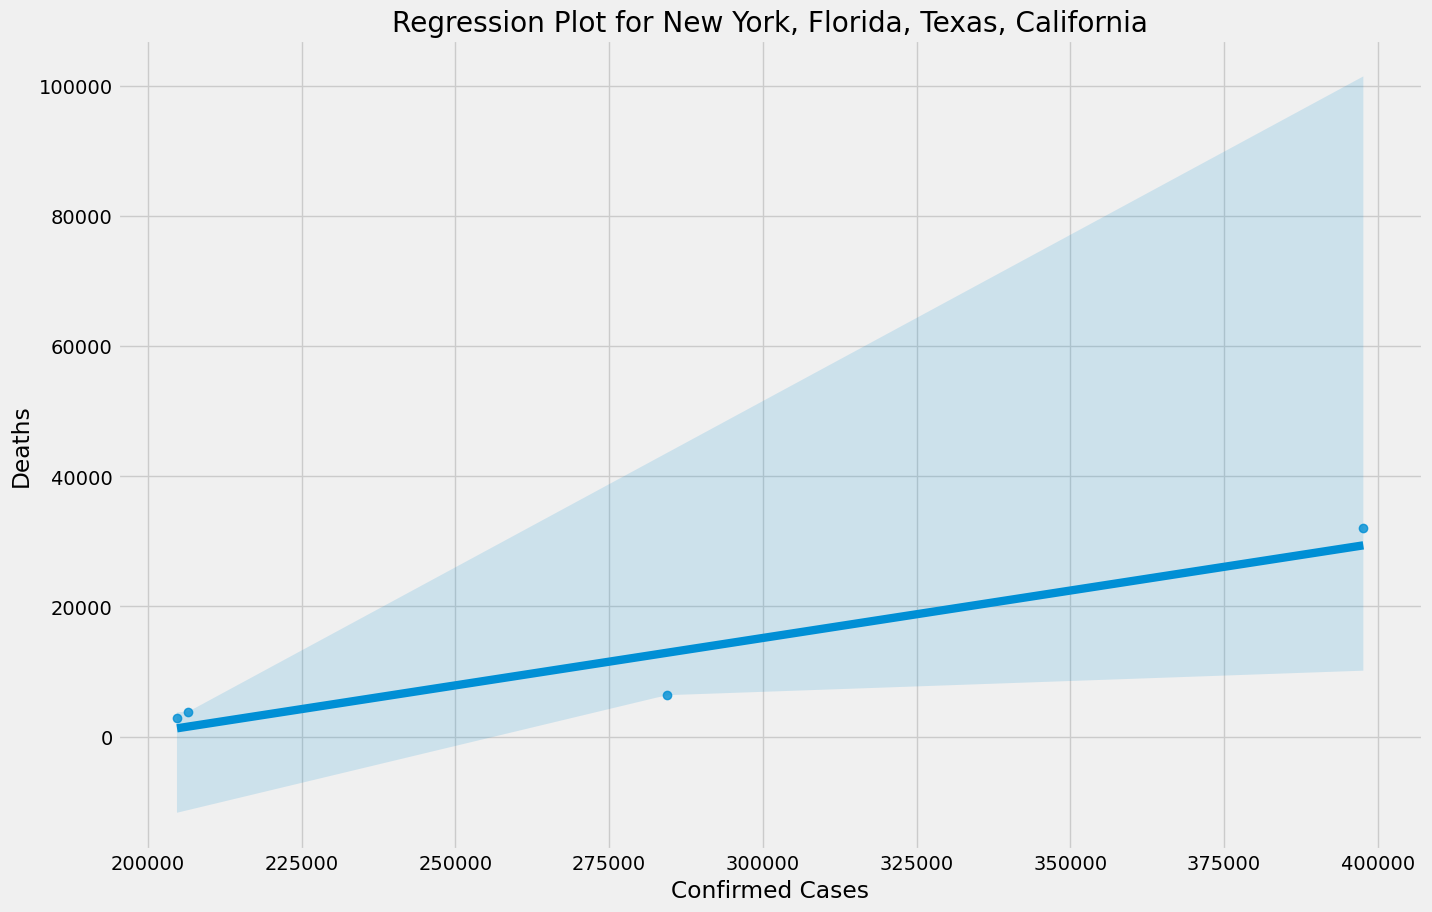

In [24]:
#Nhập mã lập trình của bạn tại đây:
df = us_medical_data[['Province_State', 'Confirmed', 'Deaths']]

states= ['New York', 'Florida', 'Texas', 'California']
rg_df = df[df['Province_State'].isin(states)]

plt.figure(figsize=(15, 10))
ax = sns.regplot(x='Confirmed', y='Deaths', data=rg_df)
ax.set(xlabel='Confirmed Cases', ylabel='Deaths')
ax.set_title('Regression Plot for New York, Florida, Texas, California')
plt.show()